## 3.2 การปรับปรุงโมเดลความแปรปรวนสูง

จากคำอธิบายก่อนหน้านี้ กรณีที่ไม่ต้องการเปลี่ยนสถาปัตยกรรมของโครงข่ายและไม่สามารถเพิ่มข้อมูล 
การปรับปรุงโมเดลที่มีความแปรปรวนสูงคือลดผลจากการฟิตเกิน ซึ่งมีวิธีการที่นิยมอยู่ 2 
วิธีคือการทำเรกูลาร์ไรเซชันและการดรอปเอาต์เซลล์ของโครงข่าย

### 3.2.1 การเรกูลาร์ไรเซชันโครงข่ายประสาทเทียม

วิธีการเรกูลาร์ไรเซชัน (regularization) เป็นทางแก้หนึ่งสำหรับปัญหาฟิตเกินที่ทำให้เกิดความแปรปรวนสูง 
แนวทางคือการลดค่าน้ำหนักในเซลล์ของโครงข่ายประสาทเทียม เมื่อผลตอบสนองของบางเซลล์ถูกลดลงจะช่วยแก้การฟิตเกินลงได้
(หลักการเช่นเดียวกันถูกใช้ในวิธีการดรอปเอาต์โดยตัดบางเซลล์ในโครงข่ายออก) หากเปรียบเทียบการจำแนกทวิภาคในรูปที่ 3.1 
เรกูลาร์ไรเซชันจะช่วยเปลี่ยนเอาต์พุตที่มีความแปรปรวนสูง (c) เข้าสู่เอาต์พุตทางด้านซ้าย (a)
โดยหากปรับพารามิเตอร์อย่างเหมาะสมคาดหวังที่จะได้การจำแนกประมาณในภาพกลาง (b) หรือหากมองในอีกแง่มุมหนึ่ง 
การลดค่าน้ำหนักทำให้ฟังก์ชันกระตุ้นเช่น $\sigma()$ หรือ $tanh()$ ทำงานในช่วงที่เป็นเชิงเส้นมากขึ้น

การลดค่าน้ำหนักทำได้โดยเพิ่มพจน์ลงโทษค่าน้ำหนักในฟังก์ชันมูลค่า ยกตัวอย่างกรณีโมเดลการถดถอยลอจิสติก ฟังก์ชันมููลค่าใหม่จะเขียนได้เป็นดังนี้

$$
J(w,b) = \frac{1}{m}\sum_{i=1}^m\mathcal{L}(\hat{y}^{(i)},y^{(i)})+\frac{\lambda}{2m}\lVert w\rVert_2^2 \tag{3.1}
$$

โดยค่า $\lambda$ เรียกว่าพารามิเตอร์การเรกูลาร์ไรเซชัน เป็นไฮเปอร์พารามิเตอร์ซึ่งต้องถูกเลือกโดยผู้พัฒนา 
เวกเตอร์ $w \in \mathbf{R}^{n_x}$ คือเวกเตอร์ของค่าน้ำหนัก 
และ $\lVert w\rVert_2^2 = \sum_{j=1}^{n_x}w_j^2 = w^Tw$ 
คือกำลังสองของค่านอร์มสองของ $w$ ดังนั้น (3.1) ถูกเรียกแบบเต็มว่าการเรกูลาร์ไรเซชันแบบ L2

ผู้อ่านอาจสงสัยว่าทำไมเราเพิ่มแต่พจน์ที่ขึ้นกับ $w$ ในฟังก์ชันมูลค่าโดยไม่สนใจค่าเอนเอียง $b$ เหตุผลคือค่าเอนเอียงเป็นเพียงตัวเลขสเกลาร์ตัวเดียว 
ค่าน้ำหนักเป็นเวกเตอร์ความยาว $n_x$ จึงมีผลกระทบต่อโครงข่ายโดยรวมมากกว่า เราสามารถใส่พจน์ลงโทษค่าเอนเอียงลงใน $J(w,b)$ 
ได้หากต้องการ แต่ก็เพียงทำให้สมการซับซ้อนขึ้นโดยไม่มีผลเด่นชัด

การเรกูลาร์ไรเซชันมีรูปแบบอื่น เช่นแบบ L1 ที่พจน์สุดท้ายด้านขวาของ (3.1) เขียนอยู่ในรูป
$$
\frac{\lambda}{2m}\lVert w \rVert_1 = \frac{\lambda}{2m}\sum_{i=1}{n_x}|w| \tag{3.2}
$$

ผลจาการใช้เรกูลาร์ไรเซชันแบบ L1 คือทำให้เวกเตอร์ $w$ เป็นแบบมากเลขศูนย์ (sparse) เป็นเสมือนการบีบอัดโมเดล 
ในทางปฏิบัติจะพบการเรกูลาร์ไรเซชันแบบ L2 มากกว่า

สำหรับโมเดล DNN เมื่อใช้เรกูลาร์ไรเซชันแบบ L2 ฟังก์ชันมูลค่าจะเขียนได้เป็นดังนี้
$$
J(W^{[1]},b^{[1]}, \ldots,W^{[L]},b^{[L]}) = \frac{1}{m}\sum_{i=1}^{m}\mathcal{L}(\hat{y}^{(i)},y^{(i)})+\frac{\lambda}{2m}\sum_{l=1}^{L}\lVert W^{[l]}\rVert_F^2 \tag{3.3}
$$
จากทฤษฎีพีชคณิตเชิงเส้น นอร์มของเมทริกซ์ $W$ จะไม่เรียกว่านอร์ม L2 แต่มีชื่อเรียกว่า นอร์มโฟรเบนิอุส (Frobenius norm) ใช้สัญลักษณ์ $\lVert . \rVert_F$ นิยามได้เป็น
$$
\lVert W^{[l]}\rVert_F^2 = \sum_{i=1}^{n^{[l]}} \sum_{j=1}^{n^{[l-1]}} \left(w_{i,j}^{[l]}\right)^2 \tag{3.4}
$$

จากขั้นตอนในแผนภาพการคำนวณย้อนหลังเมื่อมีการใช้เรกูลาร์ไรเซชันอธิบายได้ดังนี้ พิจารณาชั้น $l$ กรณีไม่มีเรกูลาร์ไรเซชัน 
ขั้นตอนวิธีการแพร่กระจายย้อนหลังจะให้ผลลัพธ์ $\frac{\partial J}{\partial W^{[l]}}$ ซึ่งเราเขียนแทนโดยย่อว่า $dW^{[l]}$ 
เรียกพจน์นี้ว่า $[BP]$ ดังนั้นเมื่อเพิ่มพจน์เรกูลาร์ไรเซชัน จะได้ว่า
$$
dW^{[l]} = [BP] + \frac{\lambda}{m}W^{[l]} \tag{3.5}
$$
และสมการอัพเดตเมทริกซ์ค่าน้ำหนัก
$$
W^{[l]} := W^{[l]} -\alpha (dW^{[l]}) = W^{[l]} -\alpha ([BP] + \frac{\lambda}{m}W^{[l]})
$$
เมื่อจัดรูปแล้วจะได้เป็น
$$
W^{[l]} := W^{[l]} -\frac{\alpha\lambda}{m} W^{[l]} -\lambda [BP] \tag{3.6}
$$

จากสมการ (3.6) ทำให้เรกูลาร์ไรเซชันนี้มีชื่อเรียกอีกอย่างหนึ่งว่า "การลดระดับค่าน้ำหนัก" (weight decay) เนื่องจากเมทริกซ์น้ำหนักจะถูกปรับค่าด้วยตัวประกอบ 
$(1-\frac{\alpha\lambda}{m})$ ที่มีค่าน้อยกว่าหนึ่งทุกครั้งของการอัพเดต 

**ตัวอย่าง 3.1**

ในตัวอย่างนี้จะต้องการใช้ไลบรารีสนับสนุน mlxtend (https://github.com/rasbt/mlxtend) 
สำหรับพล็อตเส้นแสดงเขตการจำแนก สามารถติดตั้งไลบรารีโดยรันเซลล์ด้านล่าง

In [ ]:
!pip install mlxtend

นำเข้าไลบรารีทั้งหมดที่ใช้งาน

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.io import loadmat
import sklearn
import sklearn.datasets
from mlxtend.plotting import plot_decision_regions

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

ตัวอย่างนี้ใช้ข้อมูลในแบบฝึกหัดสัปดาห์แรกของคอร์สออนไลน์ 
"Improving Deep Neural Networks: Hyperparameter tuning, Regularization and Optimization" 
โดย Prof.Andrew NG สำหรับผู้สนใจสามารถลงทะเบียนเรียนได้ที่ Coursera 
ในแบบฝึกหัดเพิ่มความน่าสนใจของโจทย์เป็นตำแหน่งผู้เล่น 2 
ทีมที่มีโอกาสโหม่งลูกฟุตบอลเมื่อผู้รักษาประตูเตะลูกมาในสนาม แต่โดยหลักการแล้วคือการจำแนกทวิภาคของข้อมูล 
2 กลุ่มในระนาบสองมิติ ในการสร้างและฝึกโมเดลจะใช้โค้ดไพธอนเช่นเดียวกับในบทที่ 2 
ผู้เรียนต้องเพิ่มส่วนเรกูลาร์ไรเซชัน (3.3) ลงในโค้ด ซึ่งสามารถทำให้เข้าใจได้อย่างถ่องแท้ 
แม้ว่าจะต้องอาศัยประสบการณ์การพัฒนาโปรแกรมโดยภาษาไพธอนอยู่พอสมควร ดังนั้นสำหรับในตัวอย่างนี้เราจะใช้ไลบรารี TF 
สร้างโมเดล DNN ซึ่งมีตัวเลือกในการทำเรกูลาร์ไรเซชันให้กับแต่ละชั้นของโมเดล

ข้อมูลถูกเก็บในไฟล์ "data.mat" ที่เราจะใส่ในไดเรคทอรี "datasets/" 
เขียนฟังก์ชัน ex31_load_data() เพื่อโหลดข้อมูลฝึกและทดสอบเข้าสู่แอเรย์พร้อมกับพล็อตในระนาบ 2 
มิติดังแสดงในรูปที่ 3.3

In [4]:
def ex31_load_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X']
    train_Y = data['y']
    test_X = data['Xval']
    test_Y = data['yval']
    for i in range(len(train_Y)):
        if train_Y[i,0] == 1:
            plt.scatter(train_X[i,0],train_X[i,1],c='orange', marker='^',s=40)
        else:
            plt.scatter(train_X[i,0],train_X[i,1],c='blue', marker='s',s=40)
    return train_X, train_Y, test_X, test_Y

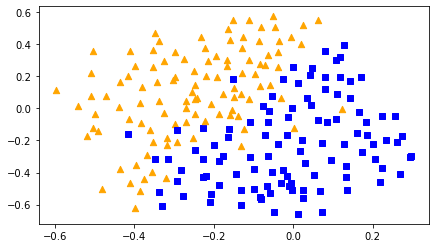

In [5]:
train_X, train_Y, test_X, test_Y = ex31_load_dataset()

รูปที่ 3.3 ข้อมูลสองมิติที่ต้องการจำแนกในตัวอย่าง 3.1

แอเรย์ข้อมูลที่คืนจากฟังก์ชัน ex31_load_dataset() เป็นชุดฝึก 211 จุดและชุดทดสอบ 200 จุด จากการประมาณโดยสายตา 
ข้อมูลในระนาบ 2 มิติในรูปที่ 3.3 สามารถถูกจำแนกได้โดยเส้นตรงในแนวทแยงมุม 
โดยพิจารณาจุดที่หลุดออกไปไกลจากกลุ่มเป็นเสมือนการรบกวน แต่โมเดลที่มีความแปรปรวนสูงจะมีแนวโน้มฟิตเกิน 
คือให้ความสำคัญกับจุดที่เป็นการรบกวนมากเกินไป 

เริ่มต้นโดยสร้างโมเดล DNN 3 ชั้นที่มีจำนวนเซลล์ 20, 30, 1 เป็นเส้นฐาน (baseline) โดยใช้ไลบรารี TF ดังนี้

In [15]:
model = Sequential([
    Flatten(input_shape=[2]),
    Dense(20, activation='relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

คอมไพล์โมเดลตามรูปแบบการจำแนกทวิภาคที่ได้อธิบายในบทที่ 2 ผู้อ่านสามารถปรับอัตราการเรียนรู้ตามต้องการ

In [16]:
model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

ฝึกโมเดลจำนวน ุ6000 รอบ เก็บข้อมูลฝึกในดิกชันนารี history (ตัวเลือก batch_size=None กำหนดเพื่อมิให้มีการแบ่งข้อมูลเป็นกลุ่มเล็ก 
ซึ่งจะได้กล่าวถึงต่อไปในบทนี้)

In [17]:
history = model.fit(train_X, train_Y, epochs=6000, batch_size=None, validation_data=(test_X,test_Y),verbose=1)

Epoch 1/6000
7/7 [==============================] - 1s 44ms/step - loss: 0.6987 - accuracy: 0.4408 - val_loss: 0.6944 - val_accuracy: 0.5600
Epoch 2/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.6964 - accuracy: 0.4597 - val_loss: 0.6921 - val_accuracy: 0.5350
Epoch 3/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4597 - val_loss: 0.6897 - val_accuracy: 0.5350
Epoch 4/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.5024 - val_loss: 0.6874 - val_accuracy: 0.5850
Epoch 5/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.6898 - accuracy: 0.5640 - val_loss: 0.6850 - val_accuracy: 0.6100
Epoch 6/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.6875 - accuracy: 0.6066 - val_loss: 0.6826 - val_accuracy: 0.6950
Epoch 7/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.6853 - accuracy: 0.6730 - val_loss: 0.6804 - val_accuracy: 0.7500
Epoch 8/6000
7/7 [

7/7 [==============================] - 0s 8ms/step - loss: 0.5984 - accuracy: 0.8104 - val_loss: 0.5884 - val_accuracy: 0.8100
Epoch 60/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.5967 - accuracy: 0.8104 - val_loss: 0.5866 - val_accuracy: 0.8100
Epoch 61/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.8104 - val_loss: 0.5848 - val_accuracy: 0.8100
Epoch 62/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.5932 - accuracy: 0.8104 - val_loss: 0.5830 - val_accuracy: 0.8100
Epoch 63/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.5914 - accuracy: 0.8104 - val_loss: 0.5811 - val_accuracy: 0.8100
Epoch 64/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.5896 - accuracy: 0.8104 - val_loss: 0.5792 - val_accuracy: 0.8100
Epoch 65/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.5879 - accuracy: 0.8057 - val_loss: 0.5772 - val_accuracy: 0.8100
Epoch 66/6000
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.4789 - accuracy: 0.8246 - val_loss: 0.4646 - val_accuracy: 0.8300
Epoch 118/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.4767 - accuracy: 0.8341 - val_loss: 0.4624 - val_accuracy: 0.8300
Epoch 119/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.4744 - accuracy: 0.8341 - val_loss: 0.4603 - val_accuracy: 0.8300
Epoch 120/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.4723 - accuracy: 0.8341 - val_loss: 0.4582 - val_accuracy: 0.8300
Epoch 121/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.4702 - accuracy: 0.8341 - val_loss: 0.4562 - val_accuracy: 0.8300
Epoch 122/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.4679 - accuracy: 0.8341 - val_loss: 0.4541 - val_accuracy: 0.8300
Epoch 123/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.4658 - accuracy: 0.8389 - val_loss: 0.4520 - val_accuracy: 0.8300
Epoch 124/6000
7/7 [=

Epoch 175/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3677 - accuracy: 0.8720 - val_loss: 0.3596 - val_accuracy: 0.8850
Epoch 176/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3664 - accuracy: 0.8768 - val_loss: 0.3582 - val_accuracy: 0.8850
Epoch 177/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3647 - accuracy: 0.8720 - val_loss: 0.3569 - val_accuracy: 0.8850
Epoch 178/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3632 - accuracy: 0.8720 - val_loss: 0.3556 - val_accuracy: 0.8850
Epoch 179/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.8720 - val_loss: 0.3542 - val_accuracy: 0.8850
Epoch 180/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3604 - accuracy: 0.8720 - val_loss: 0.3528 - val_accuracy: 0.8850
Epoch 181/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3589 - accuracy: 0.8768 - val_loss: 0.3515 - val_accuracy: 0.8850
Epoch 

Epoch 233/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3009 - accuracy: 0.8863 - val_loss: 0.3013 - val_accuracy: 0.9250
Epoch 234/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3005 - accuracy: 0.8863 - val_loss: 0.3006 - val_accuracy: 0.9250
Epoch 235/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2993 - accuracy: 0.8863 - val_loss: 0.2999 - val_accuracy: 0.9250
Epoch 236/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2988 - accuracy: 0.8910 - val_loss: 0.2992 - val_accuracy: 0.9250
Epoch 237/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2979 - accuracy: 0.8910 - val_loss: 0.2986 - val_accuracy: 0.9250
Epoch 238/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2971 - accuracy: 0.8863 - val_loss: 0.2979 - val_accuracy: 0.9250
Epoch 239/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2963 - accuracy: 0.8910 - val_loss: 0.2972 - val_accuracy: 0.9250
Epoch 

Epoch 291/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2668 - accuracy: 0.9194 - val_loss: 0.2747 - val_accuracy: 0.9250
Epoch 292/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2664 - accuracy: 0.9194 - val_loss: 0.2743 - val_accuracy: 0.9300
Epoch 293/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2662 - accuracy: 0.9194 - val_loss: 0.2740 - val_accuracy: 0.9300
Epoch 294/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2658 - accuracy: 0.9194 - val_loss: 0.2737 - val_accuracy: 0.9300
Epoch 295/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2652 - accuracy: 0.9147 - val_loss: 0.2734 - val_accuracy: 0.9300
Epoch 296/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2649 - accuracy: 0.9147 - val_loss: 0.2731 - val_accuracy: 0.9300
Epoch 297/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2647 - accuracy: 0.9147 - val_loss: 0.2729 - val_accuracy: 0.9300
Epoch 

7/7 [==============================] - 0s 9ms/step - loss: 0.2504 - accuracy: 0.9147 - val_loss: 0.2653 - val_accuracy: 0.9200
Epoch 349/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2503 - accuracy: 0.9194 - val_loss: 0.2652 - val_accuracy: 0.9200
Epoch 350/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2502 - accuracy: 0.9194 - val_loss: 0.2650 - val_accuracy: 0.9300
Epoch 351/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2499 - accuracy: 0.9147 - val_loss: 0.2649 - val_accuracy: 0.9300
Epoch 352/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2497 - accuracy: 0.9194 - val_loss: 0.2649 - val_accuracy: 0.9200
Epoch 353/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2494 - accuracy: 0.9147 - val_loss: 0.2650 - val_accuracy: 0.9150
Epoch 354/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2496 - accuracy: 0.9194 - val_loss: 0.2648 - val_accuracy: 0.9200
Epoch 355/6000
7/7 [

Epoch 406/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2423 - accuracy: 0.9242 - val_loss: 0.2633 - val_accuracy: 0.9200
Epoch 407/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2420 - accuracy: 0.9242 - val_loss: 0.2635 - val_accuracy: 0.9200
Epoch 408/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2421 - accuracy: 0.9242 - val_loss: 0.2633 - val_accuracy: 0.9200
Epoch 409/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2422 - accuracy: 0.9242 - val_loss: 0.2630 - val_accuracy: 0.9200
Epoch 410/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2429 - accuracy: 0.9194 - val_loss: 0.2630 - val_accuracy: 0.9200
Epoch 411/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2420 - accuracy: 0.9242 - val_loss: 0.2627 - val_accuracy: 0.9250
Epoch 412/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2424 - accuracy: 0.9242 - val_loss: 0.2629 - val_accuracy: 0.9250
Epoch 

7/7 [==============================] - 0s 8ms/step - loss: 0.2385 - accuracy: 0.9242 - val_loss: 0.2634 - val_accuracy: 0.9300
Epoch 464/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2382 - accuracy: 0.9242 - val_loss: 0.2635 - val_accuracy: 0.9350
Epoch 465/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2379 - accuracy: 0.9242 - val_loss: 0.2633 - val_accuracy: 0.9300
Epoch 466/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2382 - accuracy: 0.9242 - val_loss: 0.2631 - val_accuracy: 0.9300
Epoch 467/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2385 - accuracy: 0.9242 - val_loss: 0.2636 - val_accuracy: 0.9350
Epoch 468/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2380 - accuracy: 0.9242 - val_loss: 0.2636 - val_accuracy: 0.9350
Epoch 469/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2380 - accuracy: 0.9242 - val_loss: 0.2635 - val_accuracy: 0.9350
Epoch 470/6000
7/7 [=

Epoch 521/6000
7/7 [==============================] - 0s 15ms/step - loss: 0.2362 - accuracy: 0.9242 - val_loss: 0.2633 - val_accuracy: 0.9300
Epoch 522/6000
7/7 [==============================] - 0s 13ms/step - loss: 0.2359 - accuracy: 0.9242 - val_loss: 0.2636 - val_accuracy: 0.9300
Epoch 523/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2364 - accuracy: 0.9242 - val_loss: 0.2636 - val_accuracy: 0.9300
Epoch 524/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2357 - accuracy: 0.9242 - val_loss: 0.2638 - val_accuracy: 0.9350
Epoch 525/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2357 - accuracy: 0.9242 - val_loss: 0.2641 - val_accuracy: 0.9350
Epoch 526/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2353 - accuracy: 0.9242 - val_loss: 0.2644 - val_accuracy: 0.9350
Epoch 527/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2355 - accuracy: 0.9242 - val_loss: 0.2642 - val_accuracy: 0.9350
Epo

7/7 [==============================] - 0s 7ms/step - loss: 0.2340 - accuracy: 0.9336 - val_loss: 0.2652 - val_accuracy: 0.9350
Epoch 579/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2338 - accuracy: 0.9242 - val_loss: 0.2653 - val_accuracy: 0.9350
Epoch 580/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2346 - accuracy: 0.9289 - val_loss: 0.2652 - val_accuracy: 0.9350
Epoch 581/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2341 - accuracy: 0.9242 - val_loss: 0.2647 - val_accuracy: 0.9350
Epoch 582/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2347 - accuracy: 0.9242 - val_loss: 0.2655 - val_accuracy: 0.9350
Epoch 583/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2338 - accuracy: 0.9289 - val_loss: 0.2653 - val_accuracy: 0.9350
Epoch 584/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2347 - accuracy: 0.9289 - val_loss: 0.2656 - val_accuracy: 0.9350
Epoch 585/6000
7/7 [=

Epoch 636/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2336 - accuracy: 0.9242 - val_loss: 0.2655 - val_accuracy: 0.9350
Epoch 637/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2328 - accuracy: 0.9242 - val_loss: 0.2658 - val_accuracy: 0.9350
Epoch 638/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2329 - accuracy: 0.9242 - val_loss: 0.2661 - val_accuracy: 0.9350
Epoch 639/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2334 - accuracy: 0.9289 - val_loss: 0.2662 - val_accuracy: 0.9350
Epoch 640/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2333 - accuracy: 0.9147 - val_loss: 0.2658 - val_accuracy: 0.9350
Epoch 641/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2334 - accuracy: 0.9242 - val_loss: 0.2663 - val_accuracy: 0.9350
Epoch 642/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.2331 - accuracy: 0.9289 - val_loss: 0.2662 - val_accuracy: 0.9350
Epoch

Epoch 694/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2323 - accuracy: 0.9242 - val_loss: 0.2659 - val_accuracy: 0.9350
Epoch 695/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2320 - accuracy: 0.9242 - val_loss: 0.2666 - val_accuracy: 0.9350
Epoch 696/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2323 - accuracy: 0.9242 - val_loss: 0.2673 - val_accuracy: 0.9350
Epoch 697/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2324 - accuracy: 0.9242 - val_loss: 0.2672 - val_accuracy: 0.9350
Epoch 698/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2324 - accuracy: 0.9336 - val_loss: 0.2667 - val_accuracy: 0.9350
Epoch 699/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2324 - accuracy: 0.9289 - val_loss: 0.2669 - val_accuracy: 0.9350
Epoch 700/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2324 - accuracy: 0.9289 - val_loss: 0.2668 - val_accuracy: 0.9350
Epoch 

Epoch 752/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2315 - accuracy: 0.9242 - val_loss: 0.2670 - val_accuracy: 0.9350
Epoch 753/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2316 - accuracy: 0.9242 - val_loss: 0.2669 - val_accuracy: 0.9350
Epoch 754/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2318 - accuracy: 0.9242 - val_loss: 0.2670 - val_accuracy: 0.9350
Epoch 755/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2318 - accuracy: 0.9242 - val_loss: 0.2676 - val_accuracy: 0.9350
Epoch 756/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2319 - accuracy: 0.9336 - val_loss: 0.2669 - val_accuracy: 0.9350
Epoch 757/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2316 - accuracy: 0.9289 - val_loss: 0.2669 - val_accuracy: 0.9350
Epoch 758/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2323 - accuracy: 0.9242 - val_loss: 0.2677 - val_accuracy: 0.9350
Epoch 

Epoch 810/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2315 - accuracy: 0.9242 - val_loss: 0.2685 - val_accuracy: 0.9350
Epoch 811/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2312 - accuracy: 0.9336 - val_loss: 0.2690 - val_accuracy: 0.9300
Epoch 812/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2317 - accuracy: 0.9289 - val_loss: 0.2689 - val_accuracy: 0.9300
Epoch 813/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2313 - accuracy: 0.9242 - val_loss: 0.2689 - val_accuracy: 0.9300
Epoch 814/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2316 - accuracy: 0.9289 - val_loss: 0.2684 - val_accuracy: 0.9350
Epoch 815/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2314 - accuracy: 0.9336 - val_loss: 0.2679 - val_accuracy: 0.9350
Epoch 816/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2313 - accuracy: 0.9242 - val_loss: 0.2686 - val_accuracy: 0.9350
Epoch 

7/7 [==============================] - 0s 6ms/step - loss: 0.2303 - accuracy: 0.9242 - val_loss: 0.2684 - val_accuracy: 0.9350
Epoch 868/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2317 - accuracy: 0.9289 - val_loss: 0.2686 - val_accuracy: 0.9350
Epoch 869/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2302 - accuracy: 0.9336 - val_loss: 0.2688 - val_accuracy: 0.9350
Epoch 870/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2303 - accuracy: 0.9289 - val_loss: 0.2687 - val_accuracy: 0.9350
Epoch 871/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2308 - accuracy: 0.9289 - val_loss: 0.2685 - val_accuracy: 0.9350
Epoch 872/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2302 - accuracy: 0.9336 - val_loss: 0.2681 - val_accuracy: 0.9350
Epoch 873/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.9242 - val_loss: 0.2680 - val_accuracy: 0.9350
Epoch 874/6000
7/7 [=

Epoch 925/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2302 - accuracy: 0.9289 - val_loss: 0.2696 - val_accuracy: 0.9350
Epoch 926/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2304 - accuracy: 0.9242 - val_loss: 0.2689 - val_accuracy: 0.9350
Epoch 927/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2304 - accuracy: 0.9242 - val_loss: 0.2684 - val_accuracy: 0.9350
Epoch 928/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2300 - accuracy: 0.9242 - val_loss: 0.2689 - val_accuracy: 0.9350
Epoch 929/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2307 - accuracy: 0.9242 - val_loss: 0.2693 - val_accuracy: 0.9350
Epoch 930/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2303 - accuracy: 0.9336 - val_loss: 0.2690 - val_accuracy: 0.9350
Epoch 931/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2297 - accuracy: 0.9336 - val_loss: 0.2686 - val_accuracy: 0.9350
Epoch 

7/7 [==============================] - 0s 11ms/step - loss: 0.2296 - accuracy: 0.9289 - val_loss: 0.2703 - val_accuracy: 0.9350
Epoch 983/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2294 - accuracy: 0.9289 - val_loss: 0.2703 - val_accuracy: 0.9350
Epoch 984/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2295 - accuracy: 0.9289 - val_loss: 0.2703 - val_accuracy: 0.9350
Epoch 985/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2297 - accuracy: 0.9289 - val_loss: 0.2703 - val_accuracy: 0.9350
Epoch 986/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2298 - accuracy: 0.9289 - val_loss: 0.2701 - val_accuracy: 0.9350
Epoch 987/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2293 - accuracy: 0.9336 - val_loss: 0.2701 - val_accuracy: 0.9350
Epoch 988/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2304 - accuracy: 0.9289 - val_loss: 0.2710 - val_accuracy: 0.9250
Epoch 989/6000
7/7 

7/7 [==============================] - 0s 7ms/step - loss: 0.2294 - accuracy: 0.9242 - val_loss: 0.2695 - val_accuracy: 0.9350
Epoch 1040/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2297 - accuracy: 0.9289 - val_loss: 0.2689 - val_accuracy: 0.9350
Epoch 1041/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2296 - accuracy: 0.9242 - val_loss: 0.2696 - val_accuracy: 0.9350
Epoch 1042/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2292 - accuracy: 0.9242 - val_loss: 0.2703 - val_accuracy: 0.9350
Epoch 1043/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2301 - accuracy: 0.9289 - val_loss: 0.2703 - val_accuracy: 0.9350
Epoch 1044/6000
7/7 [==============================] - 0s 14ms/step - loss: 0.2291 - accuracy: 0.9336 - val_loss: 0.2700 - val_accuracy: 0.9350
Epoch 1045/6000
7/7 [==============================] - 0s 12ms/step - loss: 0.2300 - accuracy: 0.9194 - val_loss: 0.2704 - val_accuracy: 0.9350
Epoch 1046/60

7/7 [==============================] - 0s 7ms/step - loss: 0.2292 - accuracy: 0.9336 - val_loss: 0.2708 - val_accuracy: 0.9300
Epoch 1097/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2299 - accuracy: 0.9289 - val_loss: 0.2705 - val_accuracy: 0.9350
Epoch 1098/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2292 - accuracy: 0.9336 - val_loss: 0.2705 - val_accuracy: 0.9350
Epoch 1099/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2294 - accuracy: 0.9336 - val_loss: 0.2708 - val_accuracy: 0.9300
Epoch 1100/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2289 - accuracy: 0.9336 - val_loss: 0.2705 - val_accuracy: 0.9350
Epoch 1101/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2295 - accuracy: 0.9289 - val_loss: 0.2707 - val_accuracy: 0.9350
Epoch 1102/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2297 - accuracy: 0.9289 - val_loss: 0.2709 - val_accuracy: 0.9300
Epoch 1103/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2291 - accuracy: 0.9242 - val_loss: 0.2709 - val_accuracy: 0.9350
Epoch 1154/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.2293 - accuracy: 0.9289 - val_loss: 0.2710 - val_accuracy: 0.9350
Epoch 1155/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2294 - accuracy: 0.9242 - val_loss: 0.2717 - val_accuracy: 0.9300
Epoch 1156/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2297 - accuracy: 0.9289 - val_loss: 0.2720 - val_accuracy: 0.9300
Epoch 1157/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2293 - accuracy: 0.9289 - val_loss: 0.2714 - val_accuracy: 0.9300
Epoch 1158/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2291 - accuracy: 0.9289 - val_loss: 0.2707 - val_accuracy: 0.9350
Epoch 1159/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2299 - accuracy: 0.9242 - val_loss: 0.2706 - val_accuracy: 0.9350
Epoch 1160/600

7/7 [==============================] - 0s 6ms/step - loss: 0.2291 - accuracy: 0.9336 - val_loss: 0.2716 - val_accuracy: 0.9350
Epoch 1211/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2288 - accuracy: 0.9336 - val_loss: 0.2722 - val_accuracy: 0.9300
Epoch 1212/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2294 - accuracy: 0.9289 - val_loss: 0.2713 - val_accuracy: 0.9350
Epoch 1213/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2306 - accuracy: 0.9289 - val_loss: 0.2722 - val_accuracy: 0.9300
Epoch 1214/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2291 - accuracy: 0.9289 - val_loss: 0.2718 - val_accuracy: 0.9300
Epoch 1215/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2295 - accuracy: 0.9289 - val_loss: 0.2713 - val_accuracy: 0.9350
Epoch 1216/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2296 - accuracy: 0.9242 - val_loss: 0.2718 - val_accuracy: 0.9300
Epoch 1217/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2290 - accuracy: 0.9242 - val_loss: 0.2722 - val_accuracy: 0.9350
Epoch 1268/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2286 - accuracy: 0.9242 - val_loss: 0.2724 - val_accuracy: 0.9300
Epoch 1269/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2297 - accuracy: 0.9289 - val_loss: 0.2723 - val_accuracy: 0.9350
Epoch 1270/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2287 - accuracy: 0.9289 - val_loss: 0.2720 - val_accuracy: 0.9350
Epoch 1271/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2293 - accuracy: 0.9242 - val_loss: 0.2714 - val_accuracy: 0.9350
Epoch 1272/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2298 - accuracy: 0.9242 - val_loss: 0.2717 - val_accuracy: 0.9350
Epoch 1273/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2293 - accuracy: 0.9289 - val_loss: 0.2716 - val_accuracy: 0.9350
Epoch 1274/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2288 - accuracy: 0.9242 - val_loss: 0.2722 - val_accuracy: 0.9350
Epoch 1325/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2286 - accuracy: 0.9242 - val_loss: 0.2734 - val_accuracy: 0.9250
Epoch 1326/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2289 - accuracy: 0.9336 - val_loss: 0.2731 - val_accuracy: 0.9300
Epoch 1327/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2290 - accuracy: 0.9289 - val_loss: 0.2724 - val_accuracy: 0.9350
Epoch 1328/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2283 - accuracy: 0.9289 - val_loss: 0.2724 - val_accuracy: 0.9350
Epoch 1329/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2283 - accuracy: 0.9242 - val_loss: 0.2729 - val_accuracy: 0.9300
Epoch 1330/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2286 - accuracy: 0.9289 - val_loss: 0.2728 - val_accuracy: 0.9300
Epoch 1331/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2282 - accuracy: 0.9289 - val_loss: 0.2739 - val_accuracy: 0.9250
Epoch 1382/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2289 - accuracy: 0.9336 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 1383/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2288 - accuracy: 0.9336 - val_loss: 0.2744 - val_accuracy: 0.9250
Epoch 1384/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2289 - accuracy: 0.9289 - val_loss: 0.2750 - val_accuracy: 0.9250
Epoch 1385/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2294 - accuracy: 0.9242 - val_loss: 0.2732 - val_accuracy: 0.9300
Epoch 1386/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2286 - accuracy: 0.9289 - val_loss: 0.2737 - val_accuracy: 0.9300
Epoch 1387/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2292 - accuracy: 0.9242 - val_loss: 0.2734 - val_accuracy: 0.9300
Epoch 1388/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2286 - accuracy: 0.9289 - val_loss: 0.2737 - val_accuracy: 0.9300
Epoch 1439/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2297 - accuracy: 0.9289 - val_loss: 0.2740 - val_accuracy: 0.9300
Epoch 1440/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2282 - accuracy: 0.9289 - val_loss: 0.2739 - val_accuracy: 0.9300
Epoch 1441/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2285 - accuracy: 0.9242 - val_loss: 0.2735 - val_accuracy: 0.9300
Epoch 1442/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2286 - accuracy: 0.9289 - val_loss: 0.2726 - val_accuracy: 0.9350
Epoch 1443/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2284 - accuracy: 0.9242 - val_loss: 0.2732 - val_accuracy: 0.9300
Epoch 1444/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2283 - accuracy: 0.9336 - val_loss: 0.2734 - val_accuracy: 0.9300
Epoch 1445/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2286 - accuracy: 0.9242 - val_loss: 0.2729 - val_accuracy: 0.9350
Epoch 1496/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2282 - accuracy: 0.9242 - val_loss: 0.2732 - val_accuracy: 0.9350
Epoch 1497/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2284 - accuracy: 0.9242 - val_loss: 0.2743 - val_accuracy: 0.9300
Epoch 1498/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2288 - accuracy: 0.9289 - val_loss: 0.2740 - val_accuracy: 0.9300
Epoch 1499/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2288 - accuracy: 0.9336 - val_loss: 0.2738 - val_accuracy: 0.9300
Epoch 1500/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2289 - accuracy: 0.9336 - val_loss: 0.2735 - val_accuracy: 0.9300
Epoch 1501/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2280 - accuracy: 0.9336 - val_loss: 0.2731 - val_accuracy: 0.9300
Epoch 1502/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2281 - accuracy: 0.9289 - val_loss: 0.2742 - val_accuracy: 0.9300
Epoch 1553/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2287 - accuracy: 0.9336 - val_loss: 0.2739 - val_accuracy: 0.9300
Epoch 1554/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2281 - accuracy: 0.9289 - val_loss: 0.2737 - val_accuracy: 0.9300
Epoch 1555/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2287 - accuracy: 0.9242 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 1556/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2280 - accuracy: 0.9242 - val_loss: 0.2738 - val_accuracy: 0.9300
Epoch 1557/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2288 - accuracy: 0.9289 - val_loss: 0.2734 - val_accuracy: 0.9350
Epoch 1558/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2284 - accuracy: 0.9289 - val_loss: 0.2734 - val_accuracy: 0.9350
Epoch 1559/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2277 - accuracy: 0.9289 - val_loss: 0.2758 - val_accuracy: 0.9250
Epoch 1610/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2282 - accuracy: 0.9242 - val_loss: 0.2745 - val_accuracy: 0.9300
Epoch 1611/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2285 - accuracy: 0.9289 - val_loss: 0.2746 - val_accuracy: 0.9300
Epoch 1612/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2279 - accuracy: 0.9289 - val_loss: 0.2746 - val_accuracy: 0.9300
Epoch 1613/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2276 - accuracy: 0.9336 - val_loss: 0.2747 - val_accuracy: 0.9300
Epoch 1614/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2282 - accuracy: 0.9289 - val_loss: 0.2736 - val_accuracy: 0.9350
Epoch 1615/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2282 - accuracy: 0.9242 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 1616/6000

7/7 [==============================] - 0s 12ms/step - loss: 0.2285 - accuracy: 0.9242 - val_loss: 0.2764 - val_accuracy: 0.9250
Epoch 1667/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2281 - accuracy: 0.9289 - val_loss: 0.2761 - val_accuracy: 0.9250
Epoch 1668/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2284 - accuracy: 0.9242 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 1669/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2278 - accuracy: 0.9289 - val_loss: 0.2745 - val_accuracy: 0.9300
Epoch 1670/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2278 - accuracy: 0.9289 - val_loss: 0.2748 - val_accuracy: 0.9300
Epoch 1671/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2285 - accuracy: 0.9336 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 1672/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2277 - accuracy: 0.9336 - val_loss: 0.2753 - val_accuracy: 0.9300
Epoch 1673/60

7/7 [==============================] - 0s 10ms/step - loss: 0.2276 - accuracy: 0.9336 - val_loss: 0.2752 - val_accuracy: 0.9300
Epoch 1724/6000
7/7 [==============================] - 0s 17ms/step - loss: 0.2288 - accuracy: 0.9336 - val_loss: 0.2753 - val_accuracy: 0.9300
Epoch 1725/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2280 - accuracy: 0.9242 - val_loss: 0.2748 - val_accuracy: 0.9300
Epoch 1726/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2279 - accuracy: 0.9336 - val_loss: 0.2744 - val_accuracy: 0.9300
Epoch 1727/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2285 - accuracy: 0.9289 - val_loss: 0.2738 - val_accuracy: 0.9350
Epoch 1728/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2275 - accuracy: 0.9242 - val_loss: 0.2746 - val_accuracy: 0.9300
Epoch 1729/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2279 - accuracy: 0.9336 - val_loss: 0.2748 - val_accuracy: 0.9300
Epoch 1730/60

7/7 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.9289 - val_loss: 0.2748 - val_accuracy: 0.9300
Epoch 1781/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2285 - accuracy: 0.9336 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 1782/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2281 - accuracy: 0.9336 - val_loss: 0.2747 - val_accuracy: 0.9300
Epoch 1783/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2279 - accuracy: 0.9242 - val_loss: 0.2759 - val_accuracy: 0.9250
Epoch 1784/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2282 - accuracy: 0.9242 - val_loss: 0.2740 - val_accuracy: 0.9350
Epoch 1785/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2281 - accuracy: 0.9289 - val_loss: 0.2740 - val_accuracy: 0.9350
Epoch 1786/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2277 - accuracy: 0.9289 - val_loss: 0.2739 - val_accuracy: 0.9350
Epoch 1787/6000

7/7 [==============================] - 0s 10ms/step - loss: 0.2273 - accuracy: 0.9336 - val_loss: 0.2752 - val_accuracy: 0.9300
Epoch 1838/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2278 - accuracy: 0.9336 - val_loss: 0.2752 - val_accuracy: 0.9300
Epoch 1839/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2271 - accuracy: 0.9336 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 1840/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2288 - accuracy: 0.9336 - val_loss: 0.2760 - val_accuracy: 0.9250
Epoch 1841/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2276 - accuracy: 0.9289 - val_loss: 0.2757 - val_accuracy: 0.9300
Epoch 1842/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2277 - accuracy: 0.9336 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 1843/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2276 - accuracy: 0.9242 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 1844/60

7/7 [==============================] - 0s 9ms/step - loss: 0.2278 - accuracy: 0.9289 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 1895/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2278 - accuracy: 0.9289 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 1896/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2274 - accuracy: 0.9336 - val_loss: 0.2757 - val_accuracy: 0.9300
Epoch 1897/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2274 - accuracy: 0.9336 - val_loss: 0.2762 - val_accuracy: 0.9300
Epoch 1898/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2271 - accuracy: 0.9289 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 1899/6000
7/7 [==============================] - 0s 16ms/step - loss: 0.2275 - accuracy: 0.9289 - val_loss: 0.2747 - val_accuracy: 0.9300
Epoch 1900/6000
7/7 [==============================] - 0s 12ms/step - loss: 0.2280 - accuracy: 0.9289 - val_loss: 0.2745 - val_accuracy: 0.9300
Epoch 1901/60

7/7 [==============================] - 0s 7ms/step - loss: 0.2274 - accuracy: 0.9242 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 1952/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2276 - accuracy: 0.9336 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 1953/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2282 - accuracy: 0.9336 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 1954/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2288 - accuracy: 0.9242 - val_loss: 0.2746 - val_accuracy: 0.9300
Epoch 1955/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2281 - accuracy: 0.9242 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 1956/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2271 - accuracy: 0.9289 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 1957/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.9336 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 1958/6000

7/7 [==============================] - 0s 10ms/step - loss: 0.2276 - accuracy: 0.9336 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 2009/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.2273 - accuracy: 0.9336 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 2010/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2275 - accuracy: 0.9336 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 2011/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2273 - accuracy: 0.9336 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 2012/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2273 - accuracy: 0.9289 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 2013/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2283 - accuracy: 0.9242 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 2014/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2271 - accuracy: 0.9336 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2015/60

7/7 [==============================] - 0s 7ms/step - loss: 0.2281 - accuracy: 0.9289 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 2066/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2272 - accuracy: 0.9336 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 2067/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.9289 - val_loss: 0.2759 - val_accuracy: 0.9300
Epoch 2068/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2271 - accuracy: 0.9289 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 2069/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2277 - accuracy: 0.9242 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 2070/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2276 - accuracy: 0.9242 - val_loss: 0.2759 - val_accuracy: 0.9300
Epoch 2071/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2270 - accuracy: 0.9242 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2072/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2271 - accuracy: 0.9242 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 2123/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2271 - accuracy: 0.9242 - val_loss: 0.2753 - val_accuracy: 0.9300
Epoch 2124/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2271 - accuracy: 0.9336 - val_loss: 0.2757 - val_accuracy: 0.9300
Epoch 2125/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2271 - accuracy: 0.9289 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 2126/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.9336 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2127/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2275 - accuracy: 0.9289 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 2128/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2268 - accuracy: 0.9336 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2129/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2274 - accuracy: 0.9336 - val_loss: 0.2767 - val_accuracy: 0.9300
Epoch 2180/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2266 - accuracy: 0.9289 - val_loss: 0.2764 - val_accuracy: 0.9300
Epoch 2181/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2272 - accuracy: 0.9336 - val_loss: 0.2759 - val_accuracy: 0.9300
Epoch 2182/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2267 - accuracy: 0.9336 - val_loss: 0.2762 - val_accuracy: 0.9300
Epoch 2183/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2272 - accuracy: 0.9289 - val_loss: 0.2762 - val_accuracy: 0.9300
Epoch 2184/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2270 - accuracy: 0.9289 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2185/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2272 - accuracy: 0.9336 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2186/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2270 - accuracy: 0.9336 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2237/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2265 - accuracy: 0.9289 - val_loss: 0.2759 - val_accuracy: 0.9300
Epoch 2238/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2266 - accuracy: 0.9336 - val_loss: 0.2757 - val_accuracy: 0.9300
Epoch 2239/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2264 - accuracy: 0.9336 - val_loss: 0.2764 - val_accuracy: 0.9300
Epoch 2240/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2266 - accuracy: 0.9336 - val_loss: 0.2764 - val_accuracy: 0.9300
Epoch 2241/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2266 - accuracy: 0.9336 - val_loss: 0.2762 - val_accuracy: 0.9300
Epoch 2242/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2266 - accuracy: 0.9336 - val_loss: 0.2767 - val_accuracy: 0.9300
Epoch 2243/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2262 - accuracy: 0.9336 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2294/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2270 - accuracy: 0.9289 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2295/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2263 - accuracy: 0.9336 - val_loss: 0.2762 - val_accuracy: 0.9300
Epoch 2296/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2268 - accuracy: 0.9242 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2297/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2265 - accuracy: 0.9336 - val_loss: 0.2763 - val_accuracy: 0.9300
Epoch 2298/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2265 - accuracy: 0.9242 - val_loss: 0.2764 - val_accuracy: 0.9300
Epoch 2299/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2268 - accuracy: 0.9336 - val_loss: 0.2766 - val_accuracy: 0.9300
Epoch 2300/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2264 - accuracy: 0.9336 - val_loss: 0.2768 - val_accuracy: 0.9300
Epoch 2351/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2274 - accuracy: 0.9289 - val_loss: 0.2768 - val_accuracy: 0.9300
Epoch 2352/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2268 - accuracy: 0.9336 - val_loss: 0.2769 - val_accuracy: 0.9300
Epoch 2353/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2262 - accuracy: 0.9289 - val_loss: 0.2764 - val_accuracy: 0.9300
Epoch 2354/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2267 - accuracy: 0.9336 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2355/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2266 - accuracy: 0.9336 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 2356/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2272 - accuracy: 0.9336 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 2357/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2271 - accuracy: 0.9289 - val_loss: 0.2748 - val_accuracy: 0.9300
Epoch 2408/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2263 - accuracy: 0.9336 - val_loss: 0.2753 - val_accuracy: 0.9300
Epoch 2409/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2270 - accuracy: 0.9289 - val_loss: 0.2759 - val_accuracy: 0.9300
Epoch 2410/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2263 - accuracy: 0.9336 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 2411/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2270 - accuracy: 0.9336 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 2412/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2263 - accuracy: 0.9336 - val_loss: 0.2753 - val_accuracy: 0.9300
Epoch 2413/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2268 - accuracy: 0.9289 - val_loss: 0.2763 - val_accuracy: 0.9300
Epoch 2414/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2261 - accuracy: 0.9289 - val_loss: 0.2748 - val_accuracy: 0.9300
Epoch 2465/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2262 - accuracy: 0.9289 - val_loss: 0.2752 - val_accuracy: 0.9300
Epoch 2466/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2264 - accuracy: 0.9336 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 2467/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2266 - accuracy: 0.9289 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 2468/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2260 - accuracy: 0.9336 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 2469/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2268 - accuracy: 0.9289 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 2470/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2262 - accuracy: 0.9242 - val_loss: 0.2759 - val_accuracy: 0.9300
Epoch 2471/60

7/7 [==============================] - 0s 5ms/step - loss: 0.2262 - accuracy: 0.9289 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2522/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2261 - accuracy: 0.9336 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2523/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2268 - accuracy: 0.9336 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2524/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2258 - accuracy: 0.9336 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2525/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2267 - accuracy: 0.9289 - val_loss: 0.2762 - val_accuracy: 0.9300
Epoch 2526/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2268 - accuracy: 0.9289 - val_loss: 0.2769 - val_accuracy: 0.9250
Epoch 2527/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2271 - accuracy: 0.9242 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 2528/6000

7/7 [==============================] - 0s 9ms/step - loss: 0.2261 - accuracy: 0.9289 - val_loss: 0.2761 - val_accuracy: 0.9300
Epoch 2579/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2260 - accuracy: 0.9289 - val_loss: 0.2763 - val_accuracy: 0.9300
Epoch 2580/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2261 - accuracy: 0.9289 - val_loss: 0.2759 - val_accuracy: 0.9300
Epoch 2581/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2260 - accuracy: 0.9336 - val_loss: 0.2766 - val_accuracy: 0.9300
Epoch 2582/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2264 - accuracy: 0.9242 - val_loss: 0.2772 - val_accuracy: 0.9250
Epoch 2583/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2265 - accuracy: 0.9289 - val_loss: 0.2767 - val_accuracy: 0.9300
Epoch 2584/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2261 - accuracy: 0.9289 - val_loss: 0.2764 - val_accuracy: 0.9300
Epoch 2585/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2259 - accuracy: 0.9336 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2636/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2257 - accuracy: 0.9336 - val_loss: 0.2762 - val_accuracy: 0.9300
Epoch 2637/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2257 - accuracy: 0.9289 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 2638/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2260 - accuracy: 0.9289 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 2639/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2259 - accuracy: 0.9336 - val_loss: 0.2753 - val_accuracy: 0.9300
Epoch 2640/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2258 - accuracy: 0.9336 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 2641/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2262 - accuracy: 0.9289 - val_loss: 0.2747 - val_accuracy: 0.9300
Epoch 2642/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.2263 - accuracy: 0.9289 - val_loss: 0.2747 - val_accuracy: 0.9300
Epoch 2693/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2267 - accuracy: 0.9336 - val_loss: 0.2752 - val_accuracy: 0.9300
Epoch 2694/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2258 - accuracy: 0.9336 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2695/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2254 - accuracy: 0.9289 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2696/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2256 - accuracy: 0.9289 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 2697/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2254 - accuracy: 0.9336 - val_loss: 0.2757 - val_accuracy: 0.9300
Epoch 2698/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2253 - accuracy: 0.9336 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2699/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2260 - accuracy: 0.9289 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 2750/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2252 - accuracy: 0.9336 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 2751/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2255 - accuracy: 0.9242 - val_loss: 0.2763 - val_accuracy: 0.9300
Epoch 2752/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2255 - accuracy: 0.9336 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 2753/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2256 - accuracy: 0.9289 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 2754/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2259 - accuracy: 0.9336 - val_loss: 0.2753 - val_accuracy: 0.9300
Epoch 2755/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2260 - accuracy: 0.9289 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 2756/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2258 - accuracy: 0.9289 - val_loss: 0.2764 - val_accuracy: 0.9300
Epoch 2807/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2252 - accuracy: 0.9289 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2808/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2260 - accuracy: 0.9289 - val_loss: 0.2745 - val_accuracy: 0.9300
Epoch 2809/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2253 - accuracy: 0.9289 - val_loss: 0.2748 - val_accuracy: 0.9300
Epoch 2810/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2252 - accuracy: 0.9336 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 2811/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2266 - accuracy: 0.9289 - val_loss: 0.2743 - val_accuracy: 0.9300
Epoch 2812/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2260 - accuracy: 0.9289 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 2813/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2261 - accuracy: 0.9289 - val_loss: 0.2753 - val_accuracy: 0.9300
Epoch 2864/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2250 - accuracy: 0.9336 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 2865/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2257 - accuracy: 0.9289 - val_loss: 0.2759 - val_accuracy: 0.9300
Epoch 2866/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2256 - accuracy: 0.9289 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 2867/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2252 - accuracy: 0.9336 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 2868/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2254 - accuracy: 0.9336 - val_loss: 0.2752 - val_accuracy: 0.9300
Epoch 2869/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2264 - accuracy: 0.9289 - val_loss: 0.2741 - val_accuracy: 0.9300
Epoch 2870/6000

7/7 [==============================] - 0s 17ms/step - loss: 0.2249 - accuracy: 0.9336 - val_loss: 0.2743 - val_accuracy: 0.9300
Epoch 2921/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2257 - accuracy: 0.9289 - val_loss: 0.2742 - val_accuracy: 0.9300
Epoch 2922/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2247 - accuracy: 0.9289 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 2923/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2255 - accuracy: 0.9336 - val_loss: 0.2756 - val_accuracy: 0.9300
Epoch 2924/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2251 - accuracy: 0.9289 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2925/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2251 - accuracy: 0.9289 - val_loss: 0.2760 - val_accuracy: 0.9300
Epoch 2926/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2261 - accuracy: 0.9336 - val_loss: 0.2759 - val_accuracy: 0.9300
Epoch 2927/600

7/7 [==============================] - 0s 6ms/step - loss: 0.2249 - accuracy: 0.9289 - val_loss: 0.2752 - val_accuracy: 0.9300
Epoch 2978/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2250 - accuracy: 0.9289 - val_loss: 0.2767 - val_accuracy: 0.9250
Epoch 2979/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2247 - accuracy: 0.9289 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2980/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2247 - accuracy: 0.9289 - val_loss: 0.2752 - val_accuracy: 0.9300
Epoch 2981/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2249 - accuracy: 0.9336 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 2982/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2256 - accuracy: 0.9289 - val_loss: 0.2746 - val_accuracy: 0.9300
Epoch 2983/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2256 - accuracy: 0.9289 - val_loss: 0.2761 - val_accuracy: 0.9250
Epoch 2984/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.2245 - accuracy: 0.9336 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 3035/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2252 - accuracy: 0.9336 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 3036/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2262 - accuracy: 0.9242 - val_loss: 0.2757 - val_accuracy: 0.9300
Epoch 3037/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2251 - accuracy: 0.9289 - val_loss: 0.2747 - val_accuracy: 0.9300
Epoch 3038/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2244 - accuracy: 0.9289 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 3039/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2253 - accuracy: 0.9289 - val_loss: 0.2742 - val_accuracy: 0.9300
Epoch 3040/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2250 - accuracy: 0.9289 - val_loss: 0.2739 - val_accuracy: 0.9300
Epoch 3041/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2249 - accuracy: 0.9289 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 3092/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2245 - accuracy: 0.9336 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 3093/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2244 - accuracy: 0.9289 - val_loss: 0.2746 - val_accuracy: 0.9300
Epoch 3094/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2249 - accuracy: 0.9336 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 3095/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2255 - accuracy: 0.9289 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 3096/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2242 - accuracy: 0.9336 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 3097/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2251 - accuracy: 0.9289 - val_loss: 0.2745 - val_accuracy: 0.9300
Epoch 3098/600

7/7 [==============================] - 0s 6ms/step - loss: 0.2240 - accuracy: 0.9289 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 3149/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2247 - accuracy: 0.9289 - val_loss: 0.2759 - val_accuracy: 0.9300
Epoch 3150/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2248 - accuracy: 0.9336 - val_loss: 0.2764 - val_accuracy: 0.9250
Epoch 3151/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2253 - accuracy: 0.9289 - val_loss: 0.2752 - val_accuracy: 0.9300
Epoch 3152/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2249 - accuracy: 0.9289 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 3153/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2242 - accuracy: 0.9336 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 3154/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2248 - accuracy: 0.9336 - val_loss: 0.2752 - val_accuracy: 0.9300
Epoch 3155/6000

7/7 [==============================] - 0s 10ms/step - loss: 0.2244 - accuracy: 0.9289 - val_loss: 0.2763 - val_accuracy: 0.9250
Epoch 3206/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2247 - accuracy: 0.9289 - val_loss: 0.2753 - val_accuracy: 0.9300
Epoch 3207/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2245 - accuracy: 0.9289 - val_loss: 0.2746 - val_accuracy: 0.9300
Epoch 3208/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2243 - accuracy: 0.9336 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 3209/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2243 - accuracy: 0.9336 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 3210/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.9289 - val_loss: 0.2746 - val_accuracy: 0.9300
Epoch 3211/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2251 - accuracy: 0.9242 - val_loss: 0.2753 - val_accuracy: 0.9300
Epoch 3212/600

7/7 [==============================] - 0s 7ms/step - loss: 0.2253 - accuracy: 0.9336 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 3263/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2242 - accuracy: 0.9289 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 3264/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2240 - accuracy: 0.9336 - val_loss: 0.2744 - val_accuracy: 0.9300
Epoch 3265/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2241 - accuracy: 0.9289 - val_loss: 0.2745 - val_accuracy: 0.9300
Epoch 3266/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2242 - accuracy: 0.9289 - val_loss: 0.2752 - val_accuracy: 0.9300
Epoch 3267/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2237 - accuracy: 0.9289 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 3268/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2240 - accuracy: 0.9336 - val_loss: 0.2755 - val_accuracy: 0.9300
Epoch 3269/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2241 - accuracy: 0.9336 - val_loss: 0.2744 - val_accuracy: 0.9300
Epoch 3320/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2237 - accuracy: 0.9336 - val_loss: 0.2745 - val_accuracy: 0.9300
Epoch 3321/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2239 - accuracy: 0.9289 - val_loss: 0.2744 - val_accuracy: 0.9300
Epoch 3322/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2238 - accuracy: 0.9336 - val_loss: 0.2743 - val_accuracy: 0.9300
Epoch 3323/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2244 - accuracy: 0.9336 - val_loss: 0.2743 - val_accuracy: 0.9300
Epoch 3324/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2241 - accuracy: 0.9289 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 3325/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2247 - accuracy: 0.9289 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 3326/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2241 - accuracy: 0.9289 - val_loss: 0.2738 - val_accuracy: 0.9300
Epoch 3377/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2249 - accuracy: 0.9289 - val_loss: 0.2740 - val_accuracy: 0.9300
Epoch 3378/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.9336 - val_loss: 0.2740 - val_accuracy: 0.9300
Epoch 3379/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2240 - accuracy: 0.9289 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 3380/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2241 - accuracy: 0.9336 - val_loss: 0.2760 - val_accuracy: 0.9250
Epoch 3381/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2246 - accuracy: 0.9336 - val_loss: 0.2769 - val_accuracy: 0.9250
Epoch 3382/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2239 - accuracy: 0.9289 - val_loss: 0.2760 - val_accuracy: 0.9250
Epoch 3383/600

7/7 [==============================] - 0s 9ms/step - loss: 0.2241 - accuracy: 0.9336 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 3434/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2257 - accuracy: 0.9289 - val_loss: 0.2754 - val_accuracy: 0.9300
Epoch 3435/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2242 - accuracy: 0.9289 - val_loss: 0.2744 - val_accuracy: 0.9300
Epoch 3436/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2240 - accuracy: 0.9289 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 3437/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2239 - accuracy: 0.9289 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 3438/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2237 - accuracy: 0.9336 - val_loss: 0.2751 - val_accuracy: 0.9300
Epoch 3439/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2255 - accuracy: 0.9289 - val_loss: 0.2758 - val_accuracy: 0.9250
Epoch 3440/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2235 - accuracy: 0.9289 - val_loss: 0.2745 - val_accuracy: 0.9300
Epoch 3491/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2234 - accuracy: 0.9336 - val_loss: 0.2738 - val_accuracy: 0.9300
Epoch 3492/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2242 - accuracy: 0.9336 - val_loss: 0.2749 - val_accuracy: 0.9300
Epoch 3493/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2234 - accuracy: 0.9289 - val_loss: 0.2740 - val_accuracy: 0.9300
Epoch 3494/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2247 - accuracy: 0.9289 - val_loss: 0.2737 - val_accuracy: 0.9300
Epoch 3495/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2237 - accuracy: 0.9336 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 3496/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2239 - accuracy: 0.9289 - val_loss: 0.2734 - val_accuracy: 0.9300
Epoch 3497/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2242 - accuracy: 0.9242 - val_loss: 0.2742 - val_accuracy: 0.9300
Epoch 3548/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2244 - accuracy: 0.9289 - val_loss: 0.2745 - val_accuracy: 0.9300
Epoch 3549/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2240 - accuracy: 0.9289 - val_loss: 0.2745 - val_accuracy: 0.9300
Epoch 3550/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.9336 - val_loss: 0.2748 - val_accuracy: 0.9300
Epoch 3551/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2235 - accuracy: 0.9289 - val_loss: 0.2742 - val_accuracy: 0.9300
Epoch 3552/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.9336 - val_loss: 0.2743 - val_accuracy: 0.9300
Epoch 3553/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2236 - accuracy: 0.9289 - val_loss: 0.2742 - val_accuracy: 0.9300
Epoch 3554/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2233 - accuracy: 0.9336 - val_loss: 0.2739 - val_accuracy: 0.9300
Epoch 3605/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2231 - accuracy: 0.9336 - val_loss: 0.2743 - val_accuracy: 0.9300
Epoch 3606/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2237 - accuracy: 0.9336 - val_loss: 0.2747 - val_accuracy: 0.9300
Epoch 3607/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2233 - accuracy: 0.9336 - val_loss: 0.2750 - val_accuracy: 0.9300
Epoch 3608/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2233 - accuracy: 0.9289 - val_loss: 0.2743 - val_accuracy: 0.9300
Epoch 3609/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2246 - accuracy: 0.9289 - val_loss: 0.2733 - val_accuracy: 0.9300
Epoch 3610/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2234 - accuracy: 0.9289 - val_loss: 0.2731 - val_accuracy: 0.9300
Epoch 3611/6000

7/7 [==============================] - 0s 12ms/step - loss: 0.2240 - accuracy: 0.9289 - val_loss: 0.2739 - val_accuracy: 0.9300
Epoch 3662/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2236 - accuracy: 0.9289 - val_loss: 0.2728 - val_accuracy: 0.9300
Epoch 3663/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2235 - accuracy: 0.9289 - val_loss: 0.2729 - val_accuracy: 0.9300
Epoch 3664/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.2234 - accuracy: 0.9336 - val_loss: 0.2724 - val_accuracy: 0.9300
Epoch 3665/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2235 - accuracy: 0.9289 - val_loss: 0.2730 - val_accuracy: 0.9300
Epoch 3666/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2235 - accuracy: 0.9336 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 3667/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2229 - accuracy: 0.9336 - val_loss: 0.2734 - val_accuracy: 0.9300
Epoch 3668/60

7/7 [==============================] - 0s 7ms/step - loss: 0.2234 - accuracy: 0.9289 - val_loss: 0.2743 - val_accuracy: 0.9300
Epoch 3719/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2230 - accuracy: 0.9289 - val_loss: 0.2738 - val_accuracy: 0.9300
Epoch 3720/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2234 - accuracy: 0.9336 - val_loss: 0.2734 - val_accuracy: 0.9300
Epoch 3721/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2227 - accuracy: 0.9336 - val_loss: 0.2737 - val_accuracy: 0.9300
Epoch 3722/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.9336 - val_loss: 0.2727 - val_accuracy: 0.9300
Epoch 3723/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2228 - accuracy: 0.9289 - val_loss: 0.2738 - val_accuracy: 0.9300
Epoch 3724/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2228 - accuracy: 0.9289 - val_loss: 0.2735 - val_accuracy: 0.9300
Epoch 3725/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2225 - accuracy: 0.9289 - val_loss: 0.2737 - val_accuracy: 0.9300
Epoch 3776/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2234 - accuracy: 0.9336 - val_loss: 0.2731 - val_accuracy: 0.9300
Epoch 3777/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2225 - accuracy: 0.9336 - val_loss: 0.2734 - val_accuracy: 0.9300
Epoch 3778/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2229 - accuracy: 0.9336 - val_loss: 0.2737 - val_accuracy: 0.9300
Epoch 3779/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2226 - accuracy: 0.9336 - val_loss: 0.2746 - val_accuracy: 0.9300
Epoch 3780/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2232 - accuracy: 0.9289 - val_loss: 0.2739 - val_accuracy: 0.9300
Epoch 3781/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2226 - accuracy: 0.9336 - val_loss: 0.2742 - val_accuracy: 0.9300
Epoch 3782/600

7/7 [==============================] - 0s 7ms/step - loss: 0.2224 - accuracy: 0.9336 - val_loss: 0.2743 - val_accuracy: 0.9300
Epoch 3833/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2230 - accuracy: 0.9336 - val_loss: 0.2744 - val_accuracy: 0.9300
Epoch 3834/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2223 - accuracy: 0.9289 - val_loss: 0.2744 - val_accuracy: 0.9300
Epoch 3835/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2232 - accuracy: 0.9289 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 3836/6000
7/7 [==============================] - 0s 22ms/step - loss: 0.2227 - accuracy: 0.9289 - val_loss: 0.2730 - val_accuracy: 0.9300
Epoch 3837/6000
7/7 [==============================] - 0s 12ms/step - loss: 0.2234 - accuracy: 0.9336 - val_loss: 0.2728 - val_accuracy: 0.9300
Epoch 3838/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2237 - accuracy: 0.9289 - val_loss: 0.2725 - val_accuracy: 0.9300
Epoch 3839/60

7/7 [==============================] - 0s 9ms/step - loss: 0.2221 - accuracy: 0.9336 - val_loss: 0.2735 - val_accuracy: 0.9300
Epoch 3890/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2221 - accuracy: 0.9336 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 3891/6000
7/7 [==============================] - 0s 15ms/step - loss: 0.2221 - accuracy: 0.9336 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 3892/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.2222 - accuracy: 0.9336 - val_loss: 0.2729 - val_accuracy: 0.9300
Epoch 3893/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2222 - accuracy: 0.9289 - val_loss: 0.2724 - val_accuracy: 0.9300
Epoch 3894/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2220 - accuracy: 0.9289 - val_loss: 0.2733 - val_accuracy: 0.9300
Epoch 3895/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2223 - accuracy: 0.9336 - val_loss: 0.2741 - val_accuracy: 0.9300
Epoch 3896/6

7/7 [==============================] - 0s 6ms/step - loss: 0.2223 - accuracy: 0.9289 - val_loss: 0.2746 - val_accuracy: 0.9300
Epoch 3947/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2221 - accuracy: 0.9289 - val_loss: 0.2741 - val_accuracy: 0.9300
Epoch 3948/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2220 - accuracy: 0.9336 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 3949/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2222 - accuracy: 0.9289 - val_loss: 0.2724 - val_accuracy: 0.9300
Epoch 3950/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2225 - accuracy: 0.9289 - val_loss: 0.2729 - val_accuracy: 0.9300
Epoch 3951/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2230 - accuracy: 0.9289 - val_loss: 0.2716 - val_accuracy: 0.9300
Epoch 3952/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2231 - accuracy: 0.9242 - val_loss: 0.2715 - val_accuracy: 0.9300
Epoch 3953/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2221 - accuracy: 0.9289 - val_loss: 0.2735 - val_accuracy: 0.9300
Epoch 4004/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2225 - accuracy: 0.9336 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 4005/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2232 - accuracy: 0.9289 - val_loss: 0.2737 - val_accuracy: 0.9300
Epoch 4006/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2220 - accuracy: 0.9336 - val_loss: 0.2740 - val_accuracy: 0.9300
Epoch 4007/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2222 - accuracy: 0.9336 - val_loss: 0.2741 - val_accuracy: 0.9300
Epoch 4008/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2220 - accuracy: 0.9289 - val_loss: 0.2732 - val_accuracy: 0.9300
Epoch 4009/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2219 - accuracy: 0.9289 - val_loss: 0.2729 - val_accuracy: 0.9300
Epoch 4010/6000

7/7 [==============================] - 0s 9ms/step - loss: 0.2219 - accuracy: 0.9336 - val_loss: 0.2730 - val_accuracy: 0.9300
Epoch 4061/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2215 - accuracy: 0.9336 - val_loss: 0.2732 - val_accuracy: 0.9300
Epoch 4062/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2221 - accuracy: 0.9336 - val_loss: 0.2733 - val_accuracy: 0.9300
Epoch 4063/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2217 - accuracy: 0.9336 - val_loss: 0.2731 - val_accuracy: 0.9300
Epoch 4064/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2216 - accuracy: 0.9289 - val_loss: 0.2731 - val_accuracy: 0.9300
Epoch 4065/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2221 - accuracy: 0.9336 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 4066/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2215 - accuracy: 0.9289 - val_loss: 0.2730 - val_accuracy: 0.9300
Epoch 4067/6000

7/7 [==============================] - 0s 11ms/step - loss: 0.2218 - accuracy: 0.9289 - val_loss: 0.2729 - val_accuracy: 0.9300
Epoch 4118/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2215 - accuracy: 0.9336 - val_loss: 0.2730 - val_accuracy: 0.9300
Epoch 4119/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2216 - accuracy: 0.9336 - val_loss: 0.2724 - val_accuracy: 0.9300
Epoch 4120/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2221 - accuracy: 0.9289 - val_loss: 0.2729 - val_accuracy: 0.9300
Epoch 4121/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2218 - accuracy: 0.9336 - val_loss: 0.2723 - val_accuracy: 0.9300
Epoch 4122/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2216 - accuracy: 0.9336 - val_loss: 0.2727 - val_accuracy: 0.9300
Epoch 4123/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2220 - accuracy: 0.9289 - val_loss: 0.2736 - val_accuracy: 0.9300
Epoch 4124/600

7/7 [==============================] - 0s 8ms/step - loss: 0.2214 - accuracy: 0.9289 - val_loss: 0.2731 - val_accuracy: 0.9300
Epoch 4175/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2216 - accuracy: 0.9336 - val_loss: 0.2729 - val_accuracy: 0.9300
Epoch 4176/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2216 - accuracy: 0.9289 - val_loss: 0.2722 - val_accuracy: 0.9300
Epoch 4177/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2213 - accuracy: 0.9336 - val_loss: 0.2723 - val_accuracy: 0.9300
Epoch 4178/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2213 - accuracy: 0.9336 - val_loss: 0.2723 - val_accuracy: 0.9300
Epoch 4179/6000
7/7 [==============================] - 0s 17ms/step - loss: 0.2216 - accuracy: 0.9289 - val_loss: 0.2721 - val_accuracy: 0.9300
Epoch 4180/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.2211 - accuracy: 0.9336 - val_loss: 0.2723 - val_accuracy: 0.9300
Epoch 4181/60

7/7 [==============================] - 0s 12ms/step - loss: 0.2212 - accuracy: 0.9289 - val_loss: 0.2718 - val_accuracy: 0.9300
Epoch 4232/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2213 - accuracy: 0.9336 - val_loss: 0.2722 - val_accuracy: 0.9300
Epoch 4233/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2210 - accuracy: 0.9289 - val_loss: 0.2718 - val_accuracy: 0.9300
Epoch 4234/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2214 - accuracy: 0.9336 - val_loss: 0.2717 - val_accuracy: 0.9300
Epoch 4235/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2213 - accuracy: 0.9336 - val_loss: 0.2715 - val_accuracy: 0.9300
Epoch 4236/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2219 - accuracy: 0.9336 - val_loss: 0.2726 - val_accuracy: 0.9300
Epoch 4237/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2214 - accuracy: 0.9289 - val_loss: 0.2722 - val_accuracy: 0.9300
Epoch 4238/60

7/7 [==============================] - 0s 8ms/step - loss: 0.2207 - accuracy: 0.9336 - val_loss: 0.2728 - val_accuracy: 0.9300
Epoch 4289/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2207 - accuracy: 0.9289 - val_loss: 0.2729 - val_accuracy: 0.9300
Epoch 4290/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2211 - accuracy: 0.9289 - val_loss: 0.2720 - val_accuracy: 0.9300
Epoch 4291/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2209 - accuracy: 0.9336 - val_loss: 0.2728 - val_accuracy: 0.9300
Epoch 4292/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2207 - accuracy: 0.9289 - val_loss: 0.2728 - val_accuracy: 0.9300
Epoch 4293/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2222 - accuracy: 0.9289 - val_loss: 0.2721 - val_accuracy: 0.9300
Epoch 4294/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2223 - accuracy: 0.9336 - val_loss: 0.2714 - val_accuracy: 0.9300
Epoch 4295/600

7/7 [==============================] - 0s 5ms/step - loss: 0.2207 - accuracy: 0.9336 - val_loss: 0.2713 - val_accuracy: 0.9300
Epoch 4346/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2206 - accuracy: 0.9289 - val_loss: 0.2726 - val_accuracy: 0.9300
Epoch 4347/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2208 - accuracy: 0.9289 - val_loss: 0.2732 - val_accuracy: 0.9300
Epoch 4348/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2209 - accuracy: 0.9336 - val_loss: 0.2731 - val_accuracy: 0.9300
Epoch 4349/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2215 - accuracy: 0.9336 - val_loss: 0.2722 - val_accuracy: 0.9300
Epoch 4350/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2207 - accuracy: 0.9289 - val_loss: 0.2711 - val_accuracy: 0.9300
Epoch 4351/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2211 - accuracy: 0.9336 - val_loss: 0.2718 - val_accuracy: 0.9300
Epoch 4352/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2209 - accuracy: 0.9289 - val_loss: 0.2715 - val_accuracy: 0.9300
Epoch 4403/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.2200 - accuracy: 0.9336 - val_loss: 0.2718 - val_accuracy: 0.9300
Epoch 4404/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2200 - accuracy: 0.9336 - val_loss: 0.2720 - val_accuracy: 0.9300
Epoch 4405/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2202 - accuracy: 0.9336 - val_loss: 0.2718 - val_accuracy: 0.9300
Epoch 4406/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2203 - accuracy: 0.9336 - val_loss: 0.2717 - val_accuracy: 0.9300
Epoch 4407/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2208 - accuracy: 0.9336 - val_loss: 0.2726 - val_accuracy: 0.9300
Epoch 4408/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2211 - accuracy: 0.9289 - val_loss: 0.2711 - val_accuracy: 0.9300
Epoch 4409/600

7/7 [==============================] - 0s 7ms/step - loss: 0.2206 - accuracy: 0.9289 - val_loss: 0.2725 - val_accuracy: 0.9300
Epoch 4460/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2201 - accuracy: 0.9289 - val_loss: 0.2719 - val_accuracy: 0.9300
Epoch 4461/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2197 - accuracy: 0.9289 - val_loss: 0.2716 - val_accuracy: 0.9300
Epoch 4462/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2210 - accuracy: 0.9289 - val_loss: 0.2719 - val_accuracy: 0.9300
Epoch 4463/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2203 - accuracy: 0.9289 - val_loss: 0.2721 - val_accuracy: 0.9300
Epoch 4464/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2201 - accuracy: 0.9289 - val_loss: 0.2725 - val_accuracy: 0.9300
Epoch 4465/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2207 - accuracy: 0.9289 - val_loss: 0.2714 - val_accuracy: 0.9300
Epoch 4466/600

7/7 [==============================] - 0s 6ms/step - loss: 0.2196 - accuracy: 0.9289 - val_loss: 0.2720 - val_accuracy: 0.9300
Epoch 4517/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2203 - accuracy: 0.9289 - val_loss: 0.2718 - val_accuracy: 0.9300
Epoch 4518/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2197 - accuracy: 0.9336 - val_loss: 0.2711 - val_accuracy: 0.9300
Epoch 4519/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2200 - accuracy: 0.9289 - val_loss: 0.2703 - val_accuracy: 0.9300
Epoch 4520/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2207 - accuracy: 0.9289 - val_loss: 0.2704 - val_accuracy: 0.9300
Epoch 4521/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2202 - accuracy: 0.9289 - val_loss: 0.2711 - val_accuracy: 0.9300
Epoch 4522/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2207 - accuracy: 0.9336 - val_loss: 0.2710 - val_accuracy: 0.9300
Epoch 4523/600

7/7 [==============================] - 0s 6ms/step - loss: 0.2196 - accuracy: 0.9336 - val_loss: 0.2725 - val_accuracy: 0.9300
Epoch 4574/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2211 - accuracy: 0.9336 - val_loss: 0.2733 - val_accuracy: 0.9250
Epoch 4575/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2202 - accuracy: 0.9336 - val_loss: 0.2727 - val_accuracy: 0.9300
Epoch 4576/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2195 - accuracy: 0.9289 - val_loss: 0.2721 - val_accuracy: 0.9300
Epoch 4577/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2204 - accuracy: 0.9289 - val_loss: 0.2727 - val_accuracy: 0.9300
Epoch 4578/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2209 - accuracy: 0.9384 - val_loss: 0.2716 - val_accuracy: 0.9300
Epoch 4579/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2193 - accuracy: 0.9336 - val_loss: 0.2716 - val_accuracy: 0.9300
Epoch 4580/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2194 - accuracy: 0.9289 - val_loss: 0.2703 - val_accuracy: 0.9300
Epoch 4631/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2202 - accuracy: 0.9336 - val_loss: 0.2708 - val_accuracy: 0.9300
Epoch 4632/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2196 - accuracy: 0.9336 - val_loss: 0.2716 - val_accuracy: 0.9300
Epoch 4633/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2199 - accuracy: 0.9336 - val_loss: 0.2712 - val_accuracy: 0.9300
Epoch 4634/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2193 - accuracy: 0.9336 - val_loss: 0.2708 - val_accuracy: 0.9300
Epoch 4635/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2201 - accuracy: 0.9336 - val_loss: 0.2711 - val_accuracy: 0.9300
Epoch 4636/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2199 - accuracy: 0.9289 - val_loss: 0.2715 - val_accuracy: 0.9300
Epoch 4637/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2192 - accuracy: 0.9289 - val_loss: 0.2708 - val_accuracy: 0.9300
Epoch 4688/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2198 - accuracy: 0.9336 - val_loss: 0.2712 - val_accuracy: 0.9300
Epoch 4689/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2199 - accuracy: 0.9289 - val_loss: 0.2709 - val_accuracy: 0.9300
Epoch 4690/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2195 - accuracy: 0.9289 - val_loss: 0.2705 - val_accuracy: 0.9300
Epoch 4691/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2193 - accuracy: 0.9336 - val_loss: 0.2701 - val_accuracy: 0.9300
Epoch 4692/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2196 - accuracy: 0.9289 - val_loss: 0.2708 - val_accuracy: 0.9300
Epoch 4693/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2193 - accuracy: 0.9336 - val_loss: 0.2711 - val_accuracy: 0.9300
Epoch 4694/6000

7/7 [==============================] - 0s 11ms/step - loss: 0.2191 - accuracy: 0.9336 - val_loss: 0.2711 - val_accuracy: 0.9300
Epoch 4745/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2196 - accuracy: 0.9289 - val_loss: 0.2714 - val_accuracy: 0.9300
Epoch 4746/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2191 - accuracy: 0.9289 - val_loss: 0.2703 - val_accuracy: 0.9300
Epoch 4747/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2193 - accuracy: 0.9289 - val_loss: 0.2704 - val_accuracy: 0.9300
Epoch 4748/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2194 - accuracy: 0.9289 - val_loss: 0.2710 - val_accuracy: 0.9300
Epoch 4749/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2189 - accuracy: 0.9336 - val_loss: 0.2709 - val_accuracy: 0.9300
Epoch 4750/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2197 - accuracy: 0.9336 - val_loss: 0.2723 - val_accuracy: 0.9300
Epoch 4751/60

7/7 [==============================] - 0s 6ms/step - loss: 0.2194 - accuracy: 0.9289 - val_loss: 0.2703 - val_accuracy: 0.9300
Epoch 4802/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2196 - accuracy: 0.9289 - val_loss: 0.2715 - val_accuracy: 0.9300
Epoch 4803/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2187 - accuracy: 0.9289 - val_loss: 0.2712 - val_accuracy: 0.9300
Epoch 4804/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2190 - accuracy: 0.9336 - val_loss: 0.2717 - val_accuracy: 0.9300
Epoch 4805/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2192 - accuracy: 0.9289 - val_loss: 0.2715 - val_accuracy: 0.9300
Epoch 4806/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2186 - accuracy: 0.9289 - val_loss: 0.2714 - val_accuracy: 0.9300
Epoch 4807/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2191 - accuracy: 0.9289 - val_loss: 0.2706 - val_accuracy: 0.9300
Epoch 4808/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2200 - accuracy: 0.9289 - val_loss: 0.2708 - val_accuracy: 0.9300
Epoch 4859/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2188 - accuracy: 0.9289 - val_loss: 0.2720 - val_accuracy: 0.9300
Epoch 4860/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2190 - accuracy: 0.9289 - val_loss: 0.2715 - val_accuracy: 0.9300
Epoch 4861/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2184 - accuracy: 0.9289 - val_loss: 0.2723 - val_accuracy: 0.9250
Epoch 4862/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2185 - accuracy: 0.9289 - val_loss: 0.2712 - val_accuracy: 0.9300
Epoch 4863/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2187 - accuracy: 0.9289 - val_loss: 0.2709 - val_accuracy: 0.9300
Epoch 4864/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2185 - accuracy: 0.9289 - val_loss: 0.2701 - val_accuracy: 0.9300
Epoch 4865/600

7/7 [==============================] - 0s 6ms/step - loss: 0.2184 - accuracy: 0.9336 - val_loss: 0.2705 - val_accuracy: 0.9300
Epoch 4916/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2180 - accuracy: 0.9336 - val_loss: 0.2702 - val_accuracy: 0.9300
Epoch 4917/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2189 - accuracy: 0.9336 - val_loss: 0.2709 - val_accuracy: 0.9300
Epoch 4918/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2186 - accuracy: 0.9289 - val_loss: 0.2711 - val_accuracy: 0.9300
Epoch 4919/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2184 - accuracy: 0.9289 - val_loss: 0.2712 - val_accuracy: 0.9300
Epoch 4920/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2184 - accuracy: 0.9289 - val_loss: 0.2709 - val_accuracy: 0.9300
Epoch 4921/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2193 - accuracy: 0.9289 - val_loss: 0.2699 - val_accuracy: 0.9300
Epoch 4922/6000

7/7 [==============================] - 0s 11ms/step - loss: 0.2187 - accuracy: 0.9289 - val_loss: 0.2702 - val_accuracy: 0.9300
Epoch 4973/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2182 - accuracy: 0.9289 - val_loss: 0.2689 - val_accuracy: 0.9300
Epoch 4974/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2181 - accuracy: 0.9336 - val_loss: 0.2691 - val_accuracy: 0.9300
Epoch 4975/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2187 - accuracy: 0.9336 - val_loss: 0.2693 - val_accuracy: 0.9300
Epoch 4976/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2182 - accuracy: 0.9289 - val_loss: 0.2688 - val_accuracy: 0.9300
Epoch 4977/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2185 - accuracy: 0.9289 - val_loss: 0.2688 - val_accuracy: 0.9300
Epoch 4978/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2178 - accuracy: 0.9336 - val_loss: 0.2689 - val_accuracy: 0.9300
Epoch 4979/600

7/7 [==============================] - 0s 8ms/step - loss: 0.2178 - accuracy: 0.9289 - val_loss: 0.2693 - val_accuracy: 0.9300
Epoch 5030/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2177 - accuracy: 0.9336 - val_loss: 0.2693 - val_accuracy: 0.9300
Epoch 5031/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2187 - accuracy: 0.9336 - val_loss: 0.2686 - val_accuracy: 0.9300
Epoch 5032/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2177 - accuracy: 0.9289 - val_loss: 0.2692 - val_accuracy: 0.9300
Epoch 5033/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2179 - accuracy: 0.9289 - val_loss: 0.2701 - val_accuracy: 0.9300
Epoch 5034/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2177 - accuracy: 0.9289 - val_loss: 0.2695 - val_accuracy: 0.9300
Epoch 5035/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2179 - accuracy: 0.9289 - val_loss: 0.2698 - val_accuracy: 0.9300
Epoch 5036/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2182 - accuracy: 0.9336 - val_loss: 0.2707 - val_accuracy: 0.9300
Epoch 5087/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2182 - accuracy: 0.9289 - val_loss: 0.2704 - val_accuracy: 0.9300
Epoch 5088/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2184 - accuracy: 0.9336 - val_loss: 0.2721 - val_accuracy: 0.9250
Epoch 5089/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2190 - accuracy: 0.9289 - val_loss: 0.2718 - val_accuracy: 0.9250
Epoch 5090/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2175 - accuracy: 0.9336 - val_loss: 0.2702 - val_accuracy: 0.9300
Epoch 5091/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2175 - accuracy: 0.9289 - val_loss: 0.2694 - val_accuracy: 0.9300
Epoch 5092/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2177 - accuracy: 0.9336 - val_loss: 0.2690 - val_accuracy: 0.9300
Epoch 5093/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2174 - accuracy: 0.9336 - val_loss: 0.2694 - val_accuracy: 0.9300
Epoch 5144/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2173 - accuracy: 0.9336 - val_loss: 0.2688 - val_accuracy: 0.9300
Epoch 5145/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2172 - accuracy: 0.9336 - val_loss: 0.2695 - val_accuracy: 0.9300
Epoch 5146/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2174 - accuracy: 0.9289 - val_loss: 0.2683 - val_accuracy: 0.9300
Epoch 5147/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2172 - accuracy: 0.9336 - val_loss: 0.2696 - val_accuracy: 0.9300
Epoch 5148/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2170 - accuracy: 0.9336 - val_loss: 0.2697 - val_accuracy: 0.9300
Epoch 5149/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2177 - accuracy: 0.9289 - val_loss: 0.2694 - val_accuracy: 0.9300
Epoch 5150/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.2170 - accuracy: 0.9336 - val_loss: 0.2683 - val_accuracy: 0.9300
Epoch 5201/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2173 - accuracy: 0.9336 - val_loss: 0.2688 - val_accuracy: 0.9300
Epoch 5202/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2179 - accuracy: 0.9336 - val_loss: 0.2697 - val_accuracy: 0.9300
Epoch 5203/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2176 - accuracy: 0.9289 - val_loss: 0.2684 - val_accuracy: 0.9300
Epoch 5204/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2171 - accuracy: 0.9336 - val_loss: 0.2693 - val_accuracy: 0.9300
Epoch 5205/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2184 - accuracy: 0.9336 - val_loss: 0.2692 - val_accuracy: 0.9300
Epoch 5206/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2171 - accuracy: 0.9336 - val_loss: 0.2687 - val_accuracy: 0.9300
Epoch 5207/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.2175 - accuracy: 0.9289 - val_loss: 0.2690 - val_accuracy: 0.9300
Epoch 5258/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2167 - accuracy: 0.9289 - val_loss: 0.2688 - val_accuracy: 0.9300
Epoch 5259/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2172 - accuracy: 0.9289 - val_loss: 0.2682 - val_accuracy: 0.9300
Epoch 5260/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2163 - accuracy: 0.9336 - val_loss: 0.2686 - val_accuracy: 0.9300
Epoch 5261/6000
7/7 [==============================] - 0s 15ms/step - loss: 0.2168 - accuracy: 0.9289 - val_loss: 0.2682 - val_accuracy: 0.9300
Epoch 5262/6000
7/7 [==============================] - 0s 16ms/step - loss: 0.2173 - accuracy: 0.9289 - val_loss: 0.2673 - val_accuracy: 0.9300
Epoch 5263/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2169 - accuracy: 0.9289 - val_loss: 0.2680 - val_accuracy: 0.9300
Epoch 5264/6

7/7 [==============================] - 0s 6ms/step - loss: 0.2162 - accuracy: 0.9289 - val_loss: 0.2672 - val_accuracy: 0.9300
Epoch 5315/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2165 - accuracy: 0.9336 - val_loss: 0.2674 - val_accuracy: 0.9300
Epoch 5316/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2171 - accuracy: 0.9336 - val_loss: 0.2667 - val_accuracy: 0.9300
Epoch 5317/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2162 - accuracy: 0.9336 - val_loss: 0.2671 - val_accuracy: 0.9300
Epoch 5318/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2165 - accuracy: 0.9336 - val_loss: 0.2681 - val_accuracy: 0.9300
Epoch 5319/6000
7/7 [==============================] - 0s 12ms/step - loss: 0.2166 - accuracy: 0.9289 - val_loss: 0.2686 - val_accuracy: 0.9300
Epoch 5320/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2165 - accuracy: 0.9289 - val_loss: 0.2673 - val_accuracy: 0.9300
Epoch 5321/600

7/7 [==============================] - 0s 6ms/step - loss: 0.2182 - accuracy: 0.9289 - val_loss: 0.2664 - val_accuracy: 0.9300
Epoch 5372/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2161 - accuracy: 0.9336 - val_loss: 0.2669 - val_accuracy: 0.9300
Epoch 5373/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2179 - accuracy: 0.9336 - val_loss: 0.2687 - val_accuracy: 0.9300
Epoch 5374/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2163 - accuracy: 0.9289 - val_loss: 0.2683 - val_accuracy: 0.9300
Epoch 5375/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2164 - accuracy: 0.9289 - val_loss: 0.2684 - val_accuracy: 0.9300
Epoch 5376/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2177 - accuracy: 0.9289 - val_loss: 0.2674 - val_accuracy: 0.9300
Epoch 5377/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2164 - accuracy: 0.9336 - val_loss: 0.2678 - val_accuracy: 0.9300
Epoch 5378/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2162 - accuracy: 0.9289 - val_loss: 0.2673 - val_accuracy: 0.9300
Epoch 5429/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2171 - accuracy: 0.9289 - val_loss: 0.2666 - val_accuracy: 0.9300
Epoch 5430/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2164 - accuracy: 0.9289 - val_loss: 0.2664 - val_accuracy: 0.9300
Epoch 5431/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2159 - accuracy: 0.9336 - val_loss: 0.2666 - val_accuracy: 0.9300
Epoch 5432/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2166 - accuracy: 0.9289 - val_loss: 0.2683 - val_accuracy: 0.9300
Epoch 5433/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2169 - accuracy: 0.9242 - val_loss: 0.2687 - val_accuracy: 0.9300
Epoch 5434/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2160 - accuracy: 0.9289 - val_loss: 0.2693 - val_accuracy: 0.9250
Epoch 5435/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2162 - accuracy: 0.9289 - val_loss: 0.2662 - val_accuracy: 0.9300
Epoch 5486/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2155 - accuracy: 0.9289 - val_loss: 0.2671 - val_accuracy: 0.9300
Epoch 5487/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2154 - accuracy: 0.9336 - val_loss: 0.2676 - val_accuracy: 0.9300
Epoch 5488/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2162 - accuracy: 0.9336 - val_loss: 0.2659 - val_accuracy: 0.9300
Epoch 5489/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2155 - accuracy: 0.9336 - val_loss: 0.2665 - val_accuracy: 0.9300
Epoch 5490/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2159 - accuracy: 0.9289 - val_loss: 0.2670 - val_accuracy: 0.9300
Epoch 5491/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2153 - accuracy: 0.9289 - val_loss: 0.2670 - val_accuracy: 0.9300
Epoch 5492/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.2155 - accuracy: 0.9336 - val_loss: 0.2662 - val_accuracy: 0.9300
Epoch 5543/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2163 - accuracy: 0.9289 - val_loss: 0.2669 - val_accuracy: 0.9300
Epoch 5544/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2152 - accuracy: 0.9336 - val_loss: 0.2669 - val_accuracy: 0.9300
Epoch 5545/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2150 - accuracy: 0.9336 - val_loss: 0.2667 - val_accuracy: 0.9300
Epoch 5546/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2155 - accuracy: 0.9336 - val_loss: 0.2673 - val_accuracy: 0.9300
Epoch 5547/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2163 - accuracy: 0.9336 - val_loss: 0.2680 - val_accuracy: 0.9300
Epoch 5548/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2163 - accuracy: 0.9289 - val_loss: 0.2672 - val_accuracy: 0.9300
Epoch 5549/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2155 - accuracy: 0.9336 - val_loss: 0.2693 - val_accuracy: 0.9200
Epoch 5600/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2153 - accuracy: 0.9336 - val_loss: 0.2673 - val_accuracy: 0.9300
Epoch 5601/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2159 - accuracy: 0.9289 - val_loss: 0.2688 - val_accuracy: 0.9250
Epoch 5602/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2151 - accuracy: 0.9336 - val_loss: 0.2684 - val_accuracy: 0.9300
Epoch 5603/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2155 - accuracy: 0.9289 - val_loss: 0.2683 - val_accuracy: 0.9300
Epoch 5604/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2179 - accuracy: 0.9289 - val_loss: 0.2686 - val_accuracy: 0.9300
Epoch 5605/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2160 - accuracy: 0.9289 - val_loss: 0.2682 - val_accuracy: 0.9300
Epoch 5606/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2152 - accuracy: 0.9289 - val_loss: 0.2662 - val_accuracy: 0.9300
Epoch 5657/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2149 - accuracy: 0.9289 - val_loss: 0.2665 - val_accuracy: 0.9300
Epoch 5658/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2158 - accuracy: 0.9289 - val_loss: 0.2655 - val_accuracy: 0.9300
Epoch 5659/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2152 - accuracy: 0.9289 - val_loss: 0.2654 - val_accuracy: 0.9300
Epoch 5660/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2157 - accuracy: 0.9336 - val_loss: 0.2669 - val_accuracy: 0.9300
Epoch 5661/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2147 - accuracy: 0.9289 - val_loss: 0.2668 - val_accuracy: 0.9300
Epoch 5662/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2150 - accuracy: 0.9336 - val_loss: 0.2675 - val_accuracy: 0.9300
Epoch 5663/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2145 - accuracy: 0.9336 - val_loss: 0.2659 - val_accuracy: 0.9300
Epoch 5714/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2144 - accuracy: 0.9336 - val_loss: 0.2663 - val_accuracy: 0.9300
Epoch 5715/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2143 - accuracy: 0.9336 - val_loss: 0.2662 - val_accuracy: 0.9300
Epoch 5716/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2146 - accuracy: 0.9336 - val_loss: 0.2664 - val_accuracy: 0.9300
Epoch 5717/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2149 - accuracy: 0.9289 - val_loss: 0.2671 - val_accuracy: 0.9300
Epoch 5718/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2147 - accuracy: 0.9289 - val_loss: 0.2666 - val_accuracy: 0.9300
Epoch 5719/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2148 - accuracy: 0.9336 - val_loss: 0.2658 - val_accuracy: 0.9300
Epoch 5720/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2141 - accuracy: 0.9289 - val_loss: 0.2659 - val_accuracy: 0.9300
Epoch 5771/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2145 - accuracy: 0.9289 - val_loss: 0.2656 - val_accuracy: 0.9300
Epoch 5772/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2147 - accuracy: 0.9289 - val_loss: 0.2649 - val_accuracy: 0.9350
Epoch 5773/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2141 - accuracy: 0.9336 - val_loss: 0.2650 - val_accuracy: 0.9350
Epoch 5774/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2145 - accuracy: 0.9336 - val_loss: 0.2659 - val_accuracy: 0.9300
Epoch 5775/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2149 - accuracy: 0.9336 - val_loss: 0.2666 - val_accuracy: 0.9300
Epoch 5776/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2146 - accuracy: 0.9336 - val_loss: 0.2662 - val_accuracy: 0.9300
Epoch 5777/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2141 - accuracy: 0.9336 - val_loss: 0.2649 - val_accuracy: 0.9350
Epoch 5828/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2139 - accuracy: 0.9336 - val_loss: 0.2652 - val_accuracy: 0.9300
Epoch 5829/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2142 - accuracy: 0.9289 - val_loss: 0.2649 - val_accuracy: 0.9300
Epoch 5830/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2143 - accuracy: 0.9336 - val_loss: 0.2644 - val_accuracy: 0.9350
Epoch 5831/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2140 - accuracy: 0.9289 - val_loss: 0.2648 - val_accuracy: 0.9300
Epoch 5832/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2144 - accuracy: 0.9336 - val_loss: 0.2639 - val_accuracy: 0.9350
Epoch 5833/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2146 - accuracy: 0.9336 - val_loss: 0.2647 - val_accuracy: 0.9350
Epoch 5834/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2137 - accuracy: 0.9384 - val_loss: 0.2648 - val_accuracy: 0.9350
Epoch 5885/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2134 - accuracy: 0.9336 - val_loss: 0.2651 - val_accuracy: 0.9300
Epoch 5886/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2144 - accuracy: 0.9336 - val_loss: 0.2650 - val_accuracy: 0.9300
Epoch 5887/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2136 - accuracy: 0.9336 - val_loss: 0.2651 - val_accuracy: 0.9300
Epoch 5888/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2139 - accuracy: 0.9336 - val_loss: 0.2651 - val_accuracy: 0.9300
Epoch 5889/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2131 - accuracy: 0.9336 - val_loss: 0.2656 - val_accuracy: 0.9300
Epoch 5890/6000
7/7 [==============================] - 0s 12ms/step - loss: 0.2152 - accuracy: 0.9336 - val_loss: 0.2644 - val_accuracy: 0.9350
Epoch 5891/600

7/7 [==============================] - 0s 6ms/step - loss: 0.2131 - accuracy: 0.9336 - val_loss: 0.2652 - val_accuracy: 0.9300
Epoch 5942/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2139 - accuracy: 0.9289 - val_loss: 0.2658 - val_accuracy: 0.9300
Epoch 5943/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2134 - accuracy: 0.9289 - val_loss: 0.2644 - val_accuracy: 0.9300
Epoch 5944/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2133 - accuracy: 0.9289 - val_loss: 0.2642 - val_accuracy: 0.9350
Epoch 5945/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2135 - accuracy: 0.9336 - val_loss: 0.2634 - val_accuracy: 0.9350
Epoch 5946/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2141 - accuracy: 0.9289 - val_loss: 0.2653 - val_accuracy: 0.9300
Epoch 5947/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2136 - accuracy: 0.9289 - val_loss: 0.2647 - val_accuracy: 0.9300
Epoch 5948/6000

7/7 [==============================] - 0s 10ms/step - loss: 0.2128 - accuracy: 0.9384 - val_loss: 0.2641 - val_accuracy: 0.9350
Epoch 5999/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2135 - accuracy: 0.9336 - val_loss: 0.2640 - val_accuracy: 0.9350
Epoch 6000/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2135 - accuracy: 0.9289 - val_loss: 0.2635 - val_accuracy: 0.9350


เพื่อความสะดวกจะสร้างฟังก์ชันสำหรับพล็อตความแม่นยำและค่าสูญเสีย โดยสามารถเรียกใช้ในตัวอย่างอื่นที่จะนำเสนอต่อไป

In [18]:
def plot_acc_loss(history):
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    epochs=range(len(acc)) # Get number of epochs

    acc_txt = str(round(acc[len(acc)-1]*100,2))
    val_acc_txt = str(round(val_acc[len(val_acc)-1]*100,2))

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.plot(epochs, acc,'r',epochs,val_acc,'b')
    ax1.set_title('Training and validation accuracy')
    ax1.legend(["Training acc = "+acc_txt+" %","Validation acc = "+val_acc_txt+" %"])

    loss_txt = str(round(loss[len(loss)-1],2))
    val_loss_txt = str(round(val_loss[len(val_loss)-1],2))

    ax2.plot(epochs, loss, 'r',epochs, val_loss, 'b')
    ax2.legend(["Training loss = "+loss_txt,"Validation loss = "+val_loss_txt])
    ax2.set_title('Training and validation loss');


พล็อตความแม่นยำจากชุดข้อมูลฝึกและทดสอบดังแสดงในรูปที่ 3.4 

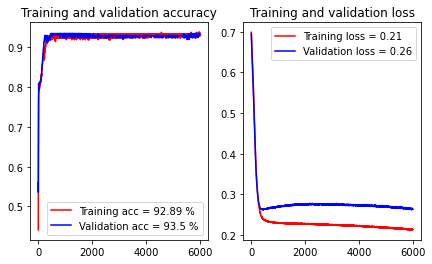

In [19]:
plot_acc_loss(history)

รูปที่ 3.4 ความแม่นยำและค่าสูญเสียจากโมเดลเส้นฐาน

สามารถสังเกตผลจากการฟิตเกินได้ในพล็อตของค่าสูญเสียทางด้านขวาของรูปที่ 3.4 
โดยขณะที่ค่าสูญเสียจากข้อมูลฝึกลดลงต่อเนื่องตามจำนวนรอบการฝึก 
ค่าสูญเสียจากข้อมูลทดสอบกลับมีแนวโน้มเพิ่มขึ้น
เมื่อพล็อตเส้นแบ่งเขตเพื่อตรวจสอบสมรรถนะการจำแนกข้อมูลจากโมเดลเส้นฐานจะได้ดังในรูปที่ 3.5


4536/4536 [==============================] - 4s 957us/step


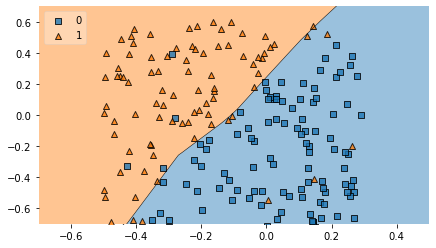

In [20]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model, legend=2)
plt.xlim([-0.7,0.5])
plt.ylim([-0.7,0.7])
plt.show()

รูปที่ 3.5 เส้นแบ่งเขตการจำแนกข้อมูลจากโมเดลเส้นฐาน

การทำเรกูลาร์ไรเซชันกับชั้นแฝงของโมเดลโดยไลบรารี TF มีตัวเลือกมากกว่าเนื้อหาที่อธิบาย 
เช่นนอกจากจะเลือกชนิด L1, L2 แล้วยังสามารถทำกับค่าน้ำหนัก ค่าเบี่ยงเบน หรือฟังก์ชันกระตุ้นก็ได้ 
ในตัวอย่างนี้เราจะเลือกทำกับค่าน้ำหนักโดยตัวเลือก kernel_regularizer สร้างโมเดล model_L2 ดังนี้ 
(ปรับค่าพารามิเตอร์ $\lambda$ ตามต้องการ)

In [21]:
from tensorflow.keras.regularizers import L2

In [22]:
model_L2 = Sequential([
    Flatten(input_shape=[2]),
    Dense(20, kernel_regularizer=L2(0.01), activation='relu'),
    Dense(30, kernel_regularizer=L2(0.01), activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

คอมไพล์และฝึกจำนวน 6,000 รอบเท่ากับโมเดลเส้นฐาน

In [23]:
model_L2.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history_L2 = model_L2.fit(train_X, train_Y, epochs=6000,batch_size=None, validation_data=(test_X,test_Y),verbose=1)

Epoch 1/6000
7/7 [==============================] - 1s 54ms/step - loss: 0.9472 - accuracy: 0.8057 - val_loss: 0.9419 - val_accuracy: 0.8100
Epoch 2/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.9445 - accuracy: 0.8294 - val_loss: 0.9391 - val_accuracy: 0.8150
Epoch 3/6000
7/7 [==============================] - 0s 13ms/step - loss: 0.9419 - accuracy: 0.8199 - val_loss: 0.9364 - val_accuracy: 0.8050
Epoch 4/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.9393 - accuracy: 0.8199 - val_loss: 0.9338 - val_accuracy: 0.8150
Epoch 5/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.9366 - accuracy: 0.8199 - val_loss: 0.9311 - val_accuracy: 0.8150
Epoch 6/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.9340 - accuracy: 0.8199 - val_loss: 0.9284 - val_accuracy: 0.8150
Epoch 7/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.9314 - accuracy: 0.8294 - val_loss: 0.9258 - val_accuracy: 0.8200
Epoch 8/6000
7/7

7/7 [==============================] - 0s 7ms/step - loss: 0.8014 - accuracy: 0.8578 - val_loss: 0.7900 - val_accuracy: 0.8600
Epoch 60/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.7992 - accuracy: 0.8483 - val_loss: 0.7872 - val_accuracy: 0.8600
Epoch 61/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.7967 - accuracy: 0.8626 - val_loss: 0.7848 - val_accuracy: 0.8600
Epoch 62/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.7943 - accuracy: 0.8531 - val_loss: 0.7823 - val_accuracy: 0.8600
Epoch 63/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.7919 - accuracy: 0.8578 - val_loss: 0.7797 - val_accuracy: 0.8600
Epoch 64/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.7897 - accuracy: 0.8578 - val_loss: 0.7772 - val_accuracy: 0.8650
Epoch 65/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.7873 - accuracy: 0.8578 - val_loss: 0.7747 - val_accuracy: 0.8650
Epoch 66/6000
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.6683 - accuracy: 0.8673 - val_loss: 0.6511 - val_accuracy: 0.8800
Epoch 118/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.8673 - val_loss: 0.6490 - val_accuracy: 0.8800
Epoch 119/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.6643 - accuracy: 0.8673 - val_loss: 0.6470 - val_accuracy: 0.8850
Epoch 120/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.6619 - accuracy: 0.8673 - val_loss: 0.6451 - val_accuracy: 0.8800
Epoch 121/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.6600 - accuracy: 0.8673 - val_loss: 0.6433 - val_accuracy: 0.8800
Epoch 122/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.6578 - accuracy: 0.8673 - val_loss: 0.6410 - val_accuracy: 0.8800
Epoch 123/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.6556 - accuracy: 0.8673 - val_loss: 0.6390 - val_accuracy: 0.8800
Epoch 124/6000
7/7 [=

Epoch 175/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.5674 - accuracy: 0.8720 - val_loss: 0.5558 - val_accuracy: 0.9100
Epoch 176/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.5662 - accuracy: 0.8720 - val_loss: 0.5545 - val_accuracy: 0.9100
Epoch 177/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.5648 - accuracy: 0.8720 - val_loss: 0.5533 - val_accuracy: 0.9100
Epoch 178/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.5638 - accuracy: 0.8720 - val_loss: 0.5521 - val_accuracy: 0.9100
Epoch 179/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.5625 - accuracy: 0.8720 - val_loss: 0.5510 - val_accuracy: 0.9100
Epoch 180/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.5610 - accuracy: 0.8720 - val_loss: 0.5495 - val_accuracy: 0.9100
Epoch 181/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.5598 - accuracy: 0.8720 - val_loss: 0.5483 - val_accuracy: 0.9100
Epoch

Epoch 233/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.5072 - accuracy: 0.8910 - val_loss: 0.5012 - val_accuracy: 0.9300
Epoch 234/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.5066 - accuracy: 0.8957 - val_loss: 0.5007 - val_accuracy: 0.9250
Epoch 235/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.5055 - accuracy: 0.8863 - val_loss: 0.4999 - val_accuracy: 0.9300
Epoch 236/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.5048 - accuracy: 0.9005 - val_loss: 0.4991 - val_accuracy: 0.9250
Epoch 237/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.5041 - accuracy: 0.8957 - val_loss: 0.4985 - val_accuracy: 0.9300
Epoch 238/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.5032 - accuracy: 0.8957 - val_loss: 0.4977 - val_accuracy: 0.9250
Epoch 239/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.5026 - accuracy: 0.8910 - val_loss: 0.4971 - val_accuracy: 0.9250
Epoch 

Epoch 291/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.4690 - accuracy: 0.9052 - val_loss: 0.4687 - val_accuracy: 0.9200
Epoch 292/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.4690 - accuracy: 0.9100 - val_loss: 0.4684 - val_accuracy: 0.9250
Epoch 293/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.4679 - accuracy: 0.9052 - val_loss: 0.4681 - val_accuracy: 0.9250
Epoch 294/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.4676 - accuracy: 0.9052 - val_loss: 0.4675 - val_accuracy: 0.9250
Epoch 295/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.4672 - accuracy: 0.9052 - val_loss: 0.4669 - val_accuracy: 0.9200
Epoch 296/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.4665 - accuracy: 0.9100 - val_loss: 0.4665 - val_accuracy: 0.9200
Epoch 297/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.4665 - accuracy: 0.9100 - val_loss: 0.4661 - val_accuracy: 0.9250
Epoch

7/7 [==============================] - 0s 7ms/step - loss: 0.4435 - accuracy: 0.9194 - val_loss: 0.4475 - val_accuracy: 0.9200
Epoch 349/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.4429 - accuracy: 0.9194 - val_loss: 0.4472 - val_accuracy: 0.9250
Epoch 350/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.4424 - accuracy: 0.9194 - val_loss: 0.4469 - val_accuracy: 0.9250
Epoch 351/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.4423 - accuracy: 0.9147 - val_loss: 0.4466 - val_accuracy: 0.9250
Epoch 352/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.4416 - accuracy: 0.9052 - val_loss: 0.4463 - val_accuracy: 0.9200
Epoch 353/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.4417 - accuracy: 0.9100 - val_loss: 0.4460 - val_accuracy: 0.9200
Epoch 354/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.4408 - accuracy: 0.9194 - val_loss: 0.4457 - val_accuracy: 0.9200
Epoch 355/6000
7/7 [=

Epoch 406/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.4241 - accuracy: 0.9147 - val_loss: 0.4317 - val_accuracy: 0.9250
Epoch 407/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.4235 - accuracy: 0.9147 - val_loss: 0.4314 - val_accuracy: 0.9250
Epoch 408/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.4226 - accuracy: 0.9147 - val_loss: 0.4311 - val_accuracy: 0.9250
Epoch 409/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.4226 - accuracy: 0.9147 - val_loss: 0.4309 - val_accuracy: 0.9200
Epoch 410/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.4222 - accuracy: 0.9147 - val_loss: 0.4307 - val_accuracy: 0.9200
Epoch 411/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.4229 - accuracy: 0.9194 - val_loss: 0.4305 - val_accuracy: 0.9200
Epoch 412/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.4224 - accuracy: 0.9194 - val_loss: 0.4302 - val_accuracy: 0.9200
Epoch 

7/7 [==============================] - 0s 6ms/step - loss: 0.4083 - accuracy: 0.9194 - val_loss: 0.4192 - val_accuracy: 0.9200
Epoch 464/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.4075 - accuracy: 0.9194 - val_loss: 0.4191 - val_accuracy: 0.9200
Epoch 465/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.4077 - accuracy: 0.9194 - val_loss: 0.4189 - val_accuracy: 0.9200
Epoch 466/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.4069 - accuracy: 0.9194 - val_loss: 0.4187 - val_accuracy: 0.9200
Epoch 467/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.4071 - accuracy: 0.9194 - val_loss: 0.4185 - val_accuracy: 0.9250
Epoch 468/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.4065 - accuracy: 0.9147 - val_loss: 0.4182 - val_accuracy: 0.9200
Epoch 469/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.4062 - accuracy: 0.9147 - val_loss: 0.4180 - val_accuracy: 0.9250
Epoch 470/6000
7/7 [=

7/7 [==============================] - 0s 9ms/step - loss: 0.3948 - accuracy: 0.9147 - val_loss: 0.4086 - val_accuracy: 0.9200
Epoch 521/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3950 - accuracy: 0.9147 - val_loss: 0.4086 - val_accuracy: 0.9200
Epoch 522/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.3957 - accuracy: 0.9147 - val_loss: 0.4084 - val_accuracy: 0.9200
Epoch 523/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3944 - accuracy: 0.9194 - val_loss: 0.4085 - val_accuracy: 0.9200
Epoch 524/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3943 - accuracy: 0.9147 - val_loss: 0.4084 - val_accuracy: 0.9200
Epoch 525/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3944 - accuracy: 0.9147 - val_loss: 0.4080 - val_accuracy: 0.9200
Epoch 526/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3940 - accuracy: 0.9147 - val_loss: 0.4079 - val_accuracy: 0.9200
Epoch 527/6000
7/7 [

7/7 [==============================] - 0s 7ms/step - loss: 0.3842 - accuracy: 0.9242 - val_loss: 0.3997 - val_accuracy: 0.9200
Epoch 578/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3833 - accuracy: 0.9194 - val_loss: 0.3994 - val_accuracy: 0.9300
Epoch 579/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3850 - accuracy: 0.9147 - val_loss: 0.3993 - val_accuracy: 0.9200
Epoch 580/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3833 - accuracy: 0.9194 - val_loss: 0.3992 - val_accuracy: 0.9300
Epoch 581/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3828 - accuracy: 0.9147 - val_loss: 0.3991 - val_accuracy: 0.9200
Epoch 582/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3827 - accuracy: 0.9242 - val_loss: 0.3989 - val_accuracy: 0.9200
Epoch 583/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3825 - accuracy: 0.9194 - val_loss: 0.3989 - val_accuracy: 0.9200
Epoch 584/6000
7/7 [=

Epoch 635/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3751 - accuracy: 0.9194 - val_loss: 0.3918 - val_accuracy: 0.9250
Epoch 636/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3753 - accuracy: 0.9194 - val_loss: 0.3918 - val_accuracy: 0.9200
Epoch 637/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3736 - accuracy: 0.9194 - val_loss: 0.3915 - val_accuracy: 0.9300
Epoch 638/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3738 - accuracy: 0.9147 - val_loss: 0.3913 - val_accuracy: 0.9300
Epoch 639/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3738 - accuracy: 0.9194 - val_loss: 0.3912 - val_accuracy: 0.9300
Epoch 640/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3737 - accuracy: 0.9194 - val_loss: 0.3911 - val_accuracy: 0.9250
Epoch 641/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3731 - accuracy: 0.9242 - val_loss: 0.3910 - val_accuracy: 0.9250
Epoch 

Epoch 693/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3661 - accuracy: 0.9194 - val_loss: 0.3852 - val_accuracy: 0.9200
Epoch 694/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3660 - accuracy: 0.9194 - val_loss: 0.3851 - val_accuracy: 0.9200
Epoch 695/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.3664 - accuracy: 0.9194 - val_loss: 0.3847 - val_accuracy: 0.9300
Epoch 696/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.3657 - accuracy: 0.9147 - val_loss: 0.3846 - val_accuracy: 0.9300
Epoch 697/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3660 - accuracy: 0.9147 - val_loss: 0.3846 - val_accuracy: 0.9300
Epoch 698/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3652 - accuracy: 0.9194 - val_loss: 0.3845 - val_accuracy: 0.9300
Epoch 699/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.3660 - accuracy: 0.9194 - val_loss: 0.3843 - val_accuracy: 0.9300
Epoc

Epoch 751/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3586 - accuracy: 0.9194 - val_loss: 0.3794 - val_accuracy: 0.9250
Epoch 752/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3587 - accuracy: 0.9147 - val_loss: 0.3791 - val_accuracy: 0.9300
Epoch 753/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3592 - accuracy: 0.9147 - val_loss: 0.3791 - val_accuracy: 0.9300
Epoch 754/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3593 - accuracy: 0.9194 - val_loss: 0.3790 - val_accuracy: 0.9300
Epoch 755/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3593 - accuracy: 0.9147 - val_loss: 0.3789 - val_accuracy: 0.9300
Epoch 756/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3585 - accuracy: 0.9194 - val_loss: 0.3787 - val_accuracy: 0.9300
Epoch 757/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3578 - accuracy: 0.9194 - val_loss: 0.3786 - val_accuracy: 0.9300
Epoch 

7/7 [==============================] - 0s 10ms/step - loss: 0.3531 - accuracy: 0.9242 - val_loss: 0.3743 - val_accuracy: 0.9300
Epoch 809/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3531 - accuracy: 0.9147 - val_loss: 0.3741 - val_accuracy: 0.9300
Epoch 810/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.3530 - accuracy: 0.9194 - val_loss: 0.3739 - val_accuracy: 0.9300
Epoch 811/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.3525 - accuracy: 0.9194 - val_loss: 0.3739 - val_accuracy: 0.9300
Epoch 812/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3522 - accuracy: 0.9242 - val_loss: 0.3738 - val_accuracy: 0.9300
Epoch 813/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3521 - accuracy: 0.9194 - val_loss: 0.3738 - val_accuracy: 0.9300
Epoch 814/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.3529 - accuracy: 0.9194 - val_loss: 0.3738 - val_accuracy: 0.9300
Epoch 815/6000
7/7 

Epoch 866/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3477 - accuracy: 0.9147 - val_loss: 0.3701 - val_accuracy: 0.9200
Epoch 867/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.3472 - accuracy: 0.9242 - val_loss: 0.3701 - val_accuracy: 0.9200
Epoch 868/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3470 - accuracy: 0.9242 - val_loss: 0.3697 - val_accuracy: 0.9300
Epoch 869/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3476 - accuracy: 0.9194 - val_loss: 0.3698 - val_accuracy: 0.9250
Epoch 870/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3470 - accuracy: 0.9194 - val_loss: 0.3697 - val_accuracy: 0.9300
Epoch 871/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3467 - accuracy: 0.9194 - val_loss: 0.3695 - val_accuracy: 0.9300
Epoch 872/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3464 - accuracy: 0.9194 - val_loss: 0.3696 - val_accuracy: 0.9300
Epoch 

Epoch 924/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3429 - accuracy: 0.9194 - val_loss: 0.3662 - val_accuracy: 0.9250
Epoch 925/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3431 - accuracy: 0.9147 - val_loss: 0.3663 - val_accuracy: 0.9200
Epoch 926/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.3427 - accuracy: 0.9194 - val_loss: 0.3658 - val_accuracy: 0.9300
Epoch 927/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.3426 - accuracy: 0.9194 - val_loss: 0.3659 - val_accuracy: 0.9250
Epoch 928/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3425 - accuracy: 0.9194 - val_loss: 0.3661 - val_accuracy: 0.9200
Epoch 929/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3422 - accuracy: 0.9194 - val_loss: 0.3660 - val_accuracy: 0.9200
Epoch 930/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3423 - accuracy: 0.9194 - val_loss: 0.3657 - val_accuracy: 0.9300
Epoc

7/7 [==============================] - 0s 6ms/step - loss: 0.3384 - accuracy: 0.9242 - val_loss: 0.3626 - val_accuracy: 0.9300
Epoch 982/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3383 - accuracy: 0.9194 - val_loss: 0.3626 - val_accuracy: 0.9300
Epoch 983/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3388 - accuracy: 0.9289 - val_loss: 0.3625 - val_accuracy: 0.9300
Epoch 984/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3380 - accuracy: 0.9194 - val_loss: 0.3625 - val_accuracy: 0.9300
Epoch 985/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.3382 - accuracy: 0.9194 - val_loss: 0.3624 - val_accuracy: 0.9300
Epoch 986/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3376 - accuracy: 0.9194 - val_loss: 0.3623 - val_accuracy: 0.9300
Epoch 987/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.3383 - accuracy: 0.9194 - val_loss: 0.3622 - val_accuracy: 0.9300
Epoch 988/6000
7/7 [=

7/7 [==============================] - 0s 7ms/step - loss: 0.3343 - accuracy: 0.9194 - val_loss: 0.3598 - val_accuracy: 0.9300
Epoch 1039/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3342 - accuracy: 0.9242 - val_loss: 0.3597 - val_accuracy: 0.9300
Epoch 1040/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3351 - accuracy: 0.9194 - val_loss: 0.3601 - val_accuracy: 0.9250
Epoch 1041/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.3352 - accuracy: 0.9147 - val_loss: 0.3598 - val_accuracy: 0.9300
Epoch 1042/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3350 - accuracy: 0.9289 - val_loss: 0.3598 - val_accuracy: 0.9300
Epoch 1043/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3348 - accuracy: 0.9242 - val_loss: 0.3598 - val_accuracy: 0.9300
Epoch 1044/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3345 - accuracy: 0.9242 - val_loss: 0.3595 - val_accuracy: 0.9300
Epoch 1045/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.3314 - accuracy: 0.9242 - val_loss: 0.3573 - val_accuracy: 0.9300
Epoch 1096/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3332 - accuracy: 0.9194 - val_loss: 0.3572 - val_accuracy: 0.9300
Epoch 1097/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3313 - accuracy: 0.9242 - val_loss: 0.3571 - val_accuracy: 0.9300
Epoch 1098/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.9194 - val_loss: 0.3571 - val_accuracy: 0.9300
Epoch 1099/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3313 - accuracy: 0.9242 - val_loss: 0.3573 - val_accuracy: 0.9300
Epoch 1100/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3312 - accuracy: 0.9242 - val_loss: 0.3575 - val_accuracy: 0.9250
Epoch 1101/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3312 - accuracy: 0.9194 - val_loss: 0.3575 - val_accuracy: 0.9200
Epoch 1102/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.3285 - accuracy: 0.9194 - val_loss: 0.3551 - val_accuracy: 0.9300
Epoch 1153/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3285 - accuracy: 0.9147 - val_loss: 0.3551 - val_accuracy: 0.9300
Epoch 1154/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3288 - accuracy: 0.9194 - val_loss: 0.3552 - val_accuracy: 0.9300
Epoch 1155/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3283 - accuracy: 0.9242 - val_loss: 0.3551 - val_accuracy: 0.9300
Epoch 1156/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3285 - accuracy: 0.9194 - val_loss: 0.3549 - val_accuracy: 0.9300
Epoch 1157/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3292 - accuracy: 0.9194 - val_loss: 0.3551 - val_accuracy: 0.9300
Epoch 1158/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3285 - accuracy: 0.9194 - val_loss: 0.3555 - val_accuracy: 0.9200
Epoch 1159/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.3260 - accuracy: 0.9194 - val_loss: 0.3537 - val_accuracy: 0.9200
Epoch 1210/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3283 - accuracy: 0.9194 - val_loss: 0.3537 - val_accuracy: 0.9200
Epoch 1211/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3261 - accuracy: 0.9194 - val_loss: 0.3532 - val_accuracy: 0.9300
Epoch 1212/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3278 - accuracy: 0.9194 - val_loss: 0.3531 - val_accuracy: 0.9300
Epoch 1213/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3260 - accuracy: 0.9194 - val_loss: 0.3531 - val_accuracy: 0.9300
Epoch 1214/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3258 - accuracy: 0.9242 - val_loss: 0.3533 - val_accuracy: 0.9300
Epoch 1215/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3258 - accuracy: 0.9194 - val_loss: 0.3538 - val_accuracy: 0.9200
Epoch 1216/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.3245 - accuracy: 0.9194 - val_loss: 0.3514 - val_accuracy: 0.9300
Epoch 1267/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3251 - accuracy: 0.9194 - val_loss: 0.3514 - val_accuracy: 0.9300
Epoch 1268/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3237 - accuracy: 0.9242 - val_loss: 0.3513 - val_accuracy: 0.9300
Epoch 1269/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3246 - accuracy: 0.9194 - val_loss: 0.3513 - val_accuracy: 0.9300
Epoch 1270/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3242 - accuracy: 0.9242 - val_loss: 0.3513 - val_accuracy: 0.9300
Epoch 1271/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3237 - accuracy: 0.9194 - val_loss: 0.3515 - val_accuracy: 0.9300
Epoch 1272/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3242 - accuracy: 0.9242 - val_loss: 0.3515 - val_accuracy: 0.9300
Epoch 1273/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.9242 - val_loss: 0.3500 - val_accuracy: 0.9300
Epoch 1324/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.9242 - val_loss: 0.3503 - val_accuracy: 0.9300
Epoch 1325/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3223 - accuracy: 0.9242 - val_loss: 0.3500 - val_accuracy: 0.9300
Epoch 1326/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3212 - accuracy: 0.9242 - val_loss: 0.3499 - val_accuracy: 0.9300
Epoch 1327/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3219 - accuracy: 0.9194 - val_loss: 0.3499 - val_accuracy: 0.9300
Epoch 1328/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3215 - accuracy: 0.9242 - val_loss: 0.3501 - val_accuracy: 0.9300
Epoch 1329/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3222 - accuracy: 0.9242 - val_loss: 0.3500 - val_accuracy: 0.9300
Epoch 1330/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.3196 - accuracy: 0.9289 - val_loss: 0.3488 - val_accuracy: 0.9300
Epoch 1381/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3202 - accuracy: 0.9242 - val_loss: 0.3489 - val_accuracy: 0.9300
Epoch 1382/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3197 - accuracy: 0.9289 - val_loss: 0.3489 - val_accuracy: 0.9300
Epoch 1383/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.3204 - accuracy: 0.9242 - val_loss: 0.3485 - val_accuracy: 0.9300
Epoch 1384/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.3201 - accuracy: 0.9194 - val_loss: 0.3484 - val_accuracy: 0.9300
Epoch 1385/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.9194 - val_loss: 0.3488 - val_accuracy: 0.9300
Epoch 1386/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3202 - accuracy: 0.9194 - val_loss: 0.3491 - val_accuracy: 0.9250
Epoch 1387/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.3192 - accuracy: 0.9242 - val_loss: 0.3479 - val_accuracy: 0.9300
Epoch 1438/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3180 - accuracy: 0.9242 - val_loss: 0.3486 - val_accuracy: 0.9250
Epoch 1439/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3187 - accuracy: 0.9194 - val_loss: 0.3475 - val_accuracy: 0.9300
Epoch 1440/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3197 - accuracy: 0.9194 - val_loss: 0.3477 - val_accuracy: 0.9300
Epoch 1441/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.9242 - val_loss: 0.3481 - val_accuracy: 0.9250
Epoch 1442/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3190 - accuracy: 0.9242 - val_loss: 0.3478 - val_accuracy: 0.9300
Epoch 1443/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3182 - accuracy: 0.9242 - val_loss: 0.3478 - val_accuracy: 0.9300
Epoch 1444/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.3167 - accuracy: 0.9242 - val_loss: 0.3465 - val_accuracy: 0.9300
Epoch 1495/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3162 - accuracy: 0.9194 - val_loss: 0.3465 - val_accuracy: 0.9300
Epoch 1496/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3164 - accuracy: 0.9242 - val_loss: 0.3464 - val_accuracy: 0.9300
Epoch 1497/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3173 - accuracy: 0.9242 - val_loss: 0.3465 - val_accuracy: 0.9300
Epoch 1498/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3161 - accuracy: 0.9194 - val_loss: 0.3466 - val_accuracy: 0.9300
Epoch 1499/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3163 - accuracy: 0.9289 - val_loss: 0.3464 - val_accuracy: 0.9300
Epoch 1500/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3166 - accuracy: 0.9194 - val_loss: 0.3464 - val_accuracy: 0.9300
Epoch 1501/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.3150 - accuracy: 0.9242 - val_loss: 0.3453 - val_accuracy: 0.9300
Epoch 1552/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3152 - accuracy: 0.9242 - val_loss: 0.3454 - val_accuracy: 0.9300
Epoch 1553/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3168 - accuracy: 0.9194 - val_loss: 0.3458 - val_accuracy: 0.9300
Epoch 1554/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3152 - accuracy: 0.9194 - val_loss: 0.3451 - val_accuracy: 0.9300
Epoch 1555/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3153 - accuracy: 0.9242 - val_loss: 0.3454 - val_accuracy: 0.9300
Epoch 1556/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3167 - accuracy: 0.9147 - val_loss: 0.3451 - val_accuracy: 0.9300
Epoch 1557/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3153 - accuracy: 0.9242 - val_loss: 0.3451 - val_accuracy: 0.9300
Epoch 1558/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.3149 - accuracy: 0.9289 - val_loss: 0.3445 - val_accuracy: 0.9300
Epoch 1609/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3143 - accuracy: 0.9289 - val_loss: 0.3444 - val_accuracy: 0.9250
Epoch 1610/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3143 - accuracy: 0.9194 - val_loss: 0.3451 - val_accuracy: 0.9250
Epoch 1611/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3142 - accuracy: 0.9289 - val_loss: 0.3444 - val_accuracy: 0.9300
Epoch 1612/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3137 - accuracy: 0.9242 - val_loss: 0.3447 - val_accuracy: 0.9300
Epoch 1613/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3147 - accuracy: 0.9194 - val_loss: 0.3453 - val_accuracy: 0.9250
Epoch 1614/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3135 - accuracy: 0.9194 - val_loss: 0.3453 - val_accuracy: 0.9300
Epoch 1615/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.3123 - accuracy: 0.9289 - val_loss: 0.3438 - val_accuracy: 0.9300
Epoch 1666/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3132 - accuracy: 0.9242 - val_loss: 0.3442 - val_accuracy: 0.9300
Epoch 1667/6000
7/7 [==============================] - 0s 12ms/step - loss: 0.3131 - accuracy: 0.9242 - val_loss: 0.3439 - val_accuracy: 0.9300
Epoch 1668/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3142 - accuracy: 0.9242 - val_loss: 0.3437 - val_accuracy: 0.9300
Epoch 1669/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3129 - accuracy: 0.9194 - val_loss: 0.3438 - val_accuracy: 0.9300
Epoch 1670/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3128 - accuracy: 0.9194 - val_loss: 0.3440 - val_accuracy: 0.9300
Epoch 1671/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3125 - accuracy: 0.9242 - val_loss: 0.3441 - val_accuracy: 0.9300
Epoch 1672/600

7/7 [==============================] - 0s 8ms/step - loss: 0.3118 - accuracy: 0.9194 - val_loss: 0.3438 - val_accuracy: 0.9250
Epoch 1723/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3132 - accuracy: 0.9147 - val_loss: 0.3456 - val_accuracy: 0.9250
Epoch 1724/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.3130 - accuracy: 0.9194 - val_loss: 0.3445 - val_accuracy: 0.9250
Epoch 1725/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.3123 - accuracy: 0.9242 - val_loss: 0.3442 - val_accuracy: 0.9250
Epoch 1726/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.3117 - accuracy: 0.9194 - val_loss: 0.3433 - val_accuracy: 0.9300
Epoch 1727/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.3115 - accuracy: 0.9194 - val_loss: 0.3435 - val_accuracy: 0.9300
Epoch 1728/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.3117 - accuracy: 0.9242 - val_loss: 0.3438 - val_accuracy: 0.9250
Epoch 1729/6000

7/7 [==============================] - 0s 4ms/step - loss: 0.3124 - accuracy: 0.9289 - val_loss: 0.3434 - val_accuracy: 0.9300
Epoch 1780/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3109 - accuracy: 0.9289 - val_loss: 0.3429 - val_accuracy: 0.9300
Epoch 1781/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3109 - accuracy: 0.9194 - val_loss: 0.3431 - val_accuracy: 0.9250
Epoch 1782/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.9242 - val_loss: 0.3431 - val_accuracy: 0.9250
Epoch 1783/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.9242 - val_loss: 0.3428 - val_accuracy: 0.9300
Epoch 1784/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3114 - accuracy: 0.9194 - val_loss: 0.3428 - val_accuracy: 0.9300
Epoch 1785/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.3100 - accuracy: 0.9242 - val_loss: 0.3429 - val_accuracy: 0.9300
Epoch 1786/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.9194 - val_loss: 0.3422 - val_accuracy: 0.9300
Epoch 1837/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.9194 - val_loss: 0.3419 - val_accuracy: 0.9300
Epoch 1838/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.9242 - val_loss: 0.3423 - val_accuracy: 0.9300
Epoch 1839/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.9194 - val_loss: 0.3423 - val_accuracy: 0.9300
Epoch 1840/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3098 - accuracy: 0.9289 - val_loss: 0.3424 - val_accuracy: 0.9300
Epoch 1841/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.9242 - val_loss: 0.3424 - val_accuracy: 0.9250
Epoch 1842/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.9242 - val_loss: 0.3424 - val_accuracy: 0.9250
Epoch 1843/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.3091 - accuracy: 0.9194 - val_loss: 0.3416 - val_accuracy: 0.9300
Epoch 1894/6000
7/7 [==============================] - 0s 12ms/step - loss: 0.3088 - accuracy: 0.9289 - val_loss: 0.3417 - val_accuracy: 0.9300
Epoch 1895/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.9242 - val_loss: 0.3415 - val_accuracy: 0.9300
Epoch 1896/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3091 - accuracy: 0.9242 - val_loss: 0.3417 - val_accuracy: 0.9300
Epoch 1897/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3090 - accuracy: 0.9194 - val_loss: 0.3421 - val_accuracy: 0.9250
Epoch 1898/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.9242 - val_loss: 0.3417 - val_accuracy: 0.9300
Epoch 1899/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3086 - accuracy: 0.9242 - val_loss: 0.3414 - val_accuracy: 0.9300
Epoch 1900/600

7/7 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.9242 - val_loss: 0.3419 - val_accuracy: 0.9200
Epoch 1951/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.9194 - val_loss: 0.3414 - val_accuracy: 0.9300
Epoch 1952/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.9242 - val_loss: 0.3416 - val_accuracy: 0.9250
Epoch 1953/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.3083 - accuracy: 0.9242 - val_loss: 0.3410 - val_accuracy: 0.9300
Epoch 1954/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3087 - accuracy: 0.9194 - val_loss: 0.3420 - val_accuracy: 0.9250
Epoch 1955/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3078 - accuracy: 0.9242 - val_loss: 0.3413 - val_accuracy: 0.9300
Epoch 1956/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3089 - accuracy: 0.9194 - val_loss: 0.3415 - val_accuracy: 0.9250
Epoch 1957/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.3086 - accuracy: 0.9194 - val_loss: 0.3418 - val_accuracy: 0.9250
Epoch 2008/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3076 - accuracy: 0.9194 - val_loss: 0.3409 - val_accuracy: 0.9300
Epoch 2009/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3069 - accuracy: 0.9147 - val_loss: 0.3405 - val_accuracy: 0.9300
Epoch 2010/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3076 - accuracy: 0.9194 - val_loss: 0.3402 - val_accuracy: 0.9250
Epoch 2011/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3067 - accuracy: 0.9194 - val_loss: 0.3403 - val_accuracy: 0.9300
Epoch 2012/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3078 - accuracy: 0.9289 - val_loss: 0.3403 - val_accuracy: 0.9300
Epoch 2013/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3068 - accuracy: 0.9194 - val_loss: 0.3407 - val_accuracy: 0.9300
Epoch 2014/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.3063 - accuracy: 0.9194 - val_loss: 0.3403 - val_accuracy: 0.9300
Epoch 2065/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3066 - accuracy: 0.9242 - val_loss: 0.3410 - val_accuracy: 0.9300
Epoch 2066/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.9194 - val_loss: 0.3405 - val_accuracy: 0.9300
Epoch 2067/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3069 - accuracy: 0.9289 - val_loss: 0.3401 - val_accuracy: 0.9300
Epoch 2068/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.9289 - val_loss: 0.3399 - val_accuracy: 0.9300
Epoch 2069/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.9194 - val_loss: 0.3399 - val_accuracy: 0.9300
Epoch 2070/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.9194 - val_loss: 0.3402 - val_accuracy: 0.9300
Epoch 2071/6000

7/7 [==============================] - 0s 3ms/step - loss: 0.3064 - accuracy: 0.9194 - val_loss: 0.3403 - val_accuracy: 0.9250
Epoch 2122/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3055 - accuracy: 0.9242 - val_loss: 0.3400 - val_accuracy: 0.9300
Epoch 2123/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.9242 - val_loss: 0.3397 - val_accuracy: 0.9300
Epoch 2124/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3058 - accuracy: 0.9242 - val_loss: 0.3397 - val_accuracy: 0.9300
Epoch 2125/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3067 - accuracy: 0.9289 - val_loss: 0.3394 - val_accuracy: 0.9250
Epoch 2126/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.3065 - accuracy: 0.9194 - val_loss: 0.3402 - val_accuracy: 0.9250
Epoch 2127/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3061 - accuracy: 0.9242 - val_loss: 0.3399 - val_accuracy: 0.9300
Epoch 2128/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.3050 - accuracy: 0.9242 - val_loss: 0.3400 - val_accuracy: 0.9300
Epoch 2179/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3060 - accuracy: 0.9194 - val_loss: 0.3393 - val_accuracy: 0.9300
Epoch 2180/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.9194 - val_loss: 0.3392 - val_accuracy: 0.9300
Epoch 2181/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3070 - accuracy: 0.9242 - val_loss: 0.3393 - val_accuracy: 0.9300
Epoch 2182/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.9242 - val_loss: 0.3397 - val_accuracy: 0.9300
Epoch 2183/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.9289 - val_loss: 0.3401 - val_accuracy: 0.9300
Epoch 2184/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3052 - accuracy: 0.9242 - val_loss: 0.3399 - val_accuracy: 0.9250
Epoch 2185/6000

7/7 [==============================] - 0s 4ms/step - loss: 0.3047 - accuracy: 0.9242 - val_loss: 0.3391 - val_accuracy: 0.9300
Epoch 2236/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3040 - accuracy: 0.9194 - val_loss: 0.3394 - val_accuracy: 0.9300
Epoch 2237/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3044 - accuracy: 0.9242 - val_loss: 0.3393 - val_accuracy: 0.9300
Epoch 2238/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3046 - accuracy: 0.9147 - val_loss: 0.3393 - val_accuracy: 0.9300
Epoch 2239/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3053 - accuracy: 0.9194 - val_loss: 0.3394 - val_accuracy: 0.9300
Epoch 2240/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3051 - accuracy: 0.9289 - val_loss: 0.3396 - val_accuracy: 0.9250
Epoch 2241/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3040 - accuracy: 0.9194 - val_loss: 0.3391 - val_accuracy: 0.9300
Epoch 2242/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.3058 - accuracy: 0.9147 - val_loss: 0.3391 - val_accuracy: 0.9300
Epoch 2293/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3048 - accuracy: 0.9194 - val_loss: 0.3391 - val_accuracy: 0.9300
Epoch 2294/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3043 - accuracy: 0.9147 - val_loss: 0.3387 - val_accuracy: 0.9300
Epoch 2295/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.9242 - val_loss: 0.3386 - val_accuracy: 0.9300
Epoch 2296/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.9194 - val_loss: 0.3384 - val_accuracy: 0.9300
Epoch 2297/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3032 - accuracy: 0.9194 - val_loss: 0.3391 - val_accuracy: 0.9300
Epoch 2298/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.9194 - val_loss: 0.3387 - val_accuracy: 0.9300
Epoch 2299/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.3034 - accuracy: 0.9242 - val_loss: 0.3383 - val_accuracy: 0.9300
Epoch 2350/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3035 - accuracy: 0.9242 - val_loss: 0.3388 - val_accuracy: 0.9300
Epoch 2351/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3049 - accuracy: 0.9147 - val_loss: 0.3385 - val_accuracy: 0.9300
Epoch 2352/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3045 - accuracy: 0.9242 - val_loss: 0.3387 - val_accuracy: 0.9300
Epoch 2353/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3029 - accuracy: 0.9194 - val_loss: 0.3392 - val_accuracy: 0.9250
Epoch 2354/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3043 - accuracy: 0.9147 - val_loss: 0.3396 - val_accuracy: 0.9250
Epoch 2355/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3036 - accuracy: 0.9289 - val_loss: 0.3389 - val_accuracy: 0.9300
Epoch 2356/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.3032 - accuracy: 0.9194 - val_loss: 0.3383 - val_accuracy: 0.9300
Epoch 2407/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3032 - accuracy: 0.9242 - val_loss: 0.3395 - val_accuracy: 0.9250
Epoch 2408/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3033 - accuracy: 0.9194 - val_loss: 0.3384 - val_accuracy: 0.9300
Epoch 2409/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3040 - accuracy: 0.9242 - val_loss: 0.3387 - val_accuracy: 0.9300
Epoch 2410/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3030 - accuracy: 0.9242 - val_loss: 0.3383 - val_accuracy: 0.9300
Epoch 2411/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3025 - accuracy: 0.9242 - val_loss: 0.3382 - val_accuracy: 0.9300
Epoch 2412/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3023 - accuracy: 0.9242 - val_loss: 0.3383 - val_accuracy: 0.9300
Epoch 2413/6000

7/7 [==============================] - 0s 3ms/step - loss: 0.3033 - accuracy: 0.9194 - val_loss: 0.3382 - val_accuracy: 0.9300
Epoch 2464/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3024 - accuracy: 0.9242 - val_loss: 0.3380 - val_accuracy: 0.9300
Epoch 2465/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3034 - accuracy: 0.9147 - val_loss: 0.3382 - val_accuracy: 0.9300
Epoch 2466/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.3021 - accuracy: 0.9242 - val_loss: 0.3381 - val_accuracy: 0.9300
Epoch 2467/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3020 - accuracy: 0.9242 - val_loss: 0.3383 - val_accuracy: 0.9300
Epoch 2468/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3031 - accuracy: 0.9242 - val_loss: 0.3379 - val_accuracy: 0.9250
Epoch 2469/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3029 - accuracy: 0.9194 - val_loss: 0.3392 - val_accuracy: 0.9250
Epoch 2470/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.3018 - accuracy: 0.9242 - val_loss: 0.3381 - val_accuracy: 0.9300
Epoch 2521/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3016 - accuracy: 0.9242 - val_loss: 0.3380 - val_accuracy: 0.9300
Epoch 2522/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3020 - accuracy: 0.9194 - val_loss: 0.3375 - val_accuracy: 0.9250
Epoch 2523/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3015 - accuracy: 0.9194 - val_loss: 0.3376 - val_accuracy: 0.9300
Epoch 2524/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3019 - accuracy: 0.9242 - val_loss: 0.3385 - val_accuracy: 0.9300
Epoch 2525/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3011 - accuracy: 0.9194 - val_loss: 0.3381 - val_accuracy: 0.9300
Epoch 2526/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3015 - accuracy: 0.9194 - val_loss: 0.3379 - val_accuracy: 0.9300
Epoch 2527/6000

7/7 [==============================] - 0s 3ms/step - loss: 0.3024 - accuracy: 0.9194 - val_loss: 0.3386 - val_accuracy: 0.9300
Epoch 2578/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.9242 - val_loss: 0.3399 - val_accuracy: 0.9250
Epoch 2579/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3021 - accuracy: 0.9147 - val_loss: 0.3387 - val_accuracy: 0.9300
Epoch 2580/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.9242 - val_loss: 0.3379 - val_accuracy: 0.9300
Epoch 2581/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3017 - accuracy: 0.9194 - val_loss: 0.3376 - val_accuracy: 0.9300
Epoch 2582/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3015 - accuracy: 0.9242 - val_loss: 0.3385 - val_accuracy: 0.9250
Epoch 2583/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.9289 - val_loss: 0.3377 - val_accuracy: 0.9300
Epoch 2584/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.3022 - accuracy: 0.9194 - val_loss: 0.3378 - val_accuracy: 0.9300
Epoch 2635/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.9289 - val_loss: 0.3370 - val_accuracy: 0.9300
Epoch 2636/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.9194 - val_loss: 0.3378 - val_accuracy: 0.9300
Epoch 2637/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.3010 - accuracy: 0.9289 - val_loss: 0.3372 - val_accuracy: 0.9300
Epoch 2638/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.9147 - val_loss: 0.3369 - val_accuracy: 0.9250
Epoch 2639/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.3025 - accuracy: 0.9147 - val_loss: 0.3369 - val_accuracy: 0.9350
Epoch 2640/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3016 - accuracy: 0.9194 - val_loss: 0.3369 - val_accuracy: 0.9250
Epoch 2641/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.3011 - accuracy: 0.9242 - val_loss: 0.3368 - val_accuracy: 0.9300
Epoch 2692/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3016 - accuracy: 0.9194 - val_loss: 0.3377 - val_accuracy: 0.9250
Epoch 2693/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3000 - accuracy: 0.9242 - val_loss: 0.3376 - val_accuracy: 0.9300
Epoch 2694/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3015 - accuracy: 0.9194 - val_loss: 0.3370 - val_accuracy: 0.9300
Epoch 2695/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3023 - accuracy: 0.9289 - val_loss: 0.3365 - val_accuracy: 0.9250
Epoch 2696/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3006 - accuracy: 0.9194 - val_loss: 0.3370 - val_accuracy: 0.9300
Epoch 2697/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3005 - accuracy: 0.9194 - val_loss: 0.3370 - val_accuracy: 0.9300
Epoch 2698/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.3001 - accuracy: 0.9242 - val_loss: 0.3366 - val_accuracy: 0.9300
Epoch 2749/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3010 - accuracy: 0.9194 - val_loss: 0.3373 - val_accuracy: 0.9300
Epoch 2750/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2999 - accuracy: 0.9242 - val_loss: 0.3369 - val_accuracy: 0.9300
Epoch 2751/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2995 - accuracy: 0.9242 - val_loss: 0.3368 - val_accuracy: 0.9300
Epoch 2752/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.3003 - accuracy: 0.9242 - val_loss: 0.3387 - val_accuracy: 0.9250
Epoch 2753/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3013 - accuracy: 0.9194 - val_loss: 0.3387 - val_accuracy: 0.9250
Epoch 2754/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3016 - accuracy: 0.9194 - val_loss: 0.3387 - val_accuracy: 0.9250
Epoch 2755/6000

7/7 [==============================] - 0s 4ms/step - loss: 0.2990 - accuracy: 0.9194 - val_loss: 0.3373 - val_accuracy: 0.9300
Epoch 2806/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2994 - accuracy: 0.9242 - val_loss: 0.3369 - val_accuracy: 0.9300
Epoch 2807/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2997 - accuracy: 0.9194 - val_loss: 0.3366 - val_accuracy: 0.9300
Epoch 2808/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2996 - accuracy: 0.9242 - val_loss: 0.3367 - val_accuracy: 0.9300
Epoch 2809/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2999 - accuracy: 0.9289 - val_loss: 0.3370 - val_accuracy: 0.9300
Epoch 2810/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2991 - accuracy: 0.9242 - val_loss: 0.3371 - val_accuracy: 0.9300
Epoch 2811/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.3032 - accuracy: 0.9147 - val_loss: 0.3381 - val_accuracy: 0.9250
Epoch 2812/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2988 - accuracy: 0.9289 - val_loss: 0.3359 - val_accuracy: 0.9350
Epoch 2863/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2991 - accuracy: 0.9242 - val_loss: 0.3359 - val_accuracy: 0.9250
Epoch 2864/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3013 - accuracy: 0.9194 - val_loss: 0.3382 - val_accuracy: 0.9250
Epoch 2865/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.3004 - accuracy: 0.9242 - val_loss: 0.3371 - val_accuracy: 0.9300
Epoch 2866/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2990 - accuracy: 0.9242 - val_loss: 0.3374 - val_accuracy: 0.9300
Epoch 2867/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2987 - accuracy: 0.9289 - val_loss: 0.3372 - val_accuracy: 0.9250
Epoch 2868/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.9289 - val_loss: 0.3376 - val_accuracy: 0.9300
Epoch 2869/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.2990 - accuracy: 0.9242 - val_loss: 0.3367 - val_accuracy: 0.9300
Epoch 2920/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2982 - accuracy: 0.9242 - val_loss: 0.3364 - val_accuracy: 0.9300
Epoch 2921/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2986 - accuracy: 0.9194 - val_loss: 0.3361 - val_accuracy: 0.9300
Epoch 2922/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2984 - accuracy: 0.9194 - val_loss: 0.3369 - val_accuracy: 0.9300
Epoch 2923/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2990 - accuracy: 0.9194 - val_loss: 0.3365 - val_accuracy: 0.9300
Epoch 2924/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.9289 - val_loss: 0.3367 - val_accuracy: 0.9300
Epoch 2925/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2996 - accuracy: 0.9242 - val_loss: 0.3369 - val_accuracy: 0.9300
Epoch 2926/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2986 - accuracy: 0.9194 - val_loss: 0.3366 - val_accuracy: 0.9300
Epoch 2977/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2989 - accuracy: 0.9242 - val_loss: 0.3376 - val_accuracy: 0.9300
Epoch 2978/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2992 - accuracy: 0.9147 - val_loss: 0.3359 - val_accuracy: 0.9300
Epoch 2979/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2978 - accuracy: 0.9242 - val_loss: 0.3357 - val_accuracy: 0.9300
Epoch 2980/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2985 - accuracy: 0.9242 - val_loss: 0.3357 - val_accuracy: 0.9250
Epoch 2981/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.9194 - val_loss: 0.3367 - val_accuracy: 0.9300
Epoch 2982/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.3019 - accuracy: 0.9100 - val_loss: 0.3367 - val_accuracy: 0.9300
Epoch 2983/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2981 - accuracy: 0.9147 - val_loss: 0.3359 - val_accuracy: 0.9250
Epoch 3034/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.3006 - accuracy: 0.9194 - val_loss: 0.3368 - val_accuracy: 0.9300
Epoch 3035/6000
7/7 [==============================] - 0s 12ms/step - loss: 0.2983 - accuracy: 0.9194 - val_loss: 0.3364 - val_accuracy: 0.9300
Epoch 3036/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2983 - accuracy: 0.9242 - val_loss: 0.3365 - val_accuracy: 0.9300
Epoch 3037/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2983 - accuracy: 0.9242 - val_loss: 0.3375 - val_accuracy: 0.9250
Epoch 3038/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.9194 - val_loss: 0.3361 - val_accuracy: 0.9300
Epoch 3039/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2980 - accuracy: 0.9242 - val_loss: 0.3360 - val_accuracy: 0.9300
Epoch 3040/600

7/7 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 0.9242 - val_loss: 0.3359 - val_accuracy: 0.9300
Epoch 3091/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2980 - accuracy: 0.9242 - val_loss: 0.3360 - val_accuracy: 0.9300
Epoch 3092/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2994 - accuracy: 0.9194 - val_loss: 0.3362 - val_accuracy: 0.9300
Epoch 3093/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2976 - accuracy: 0.9194 - val_loss: 0.3364 - val_accuracy: 0.9300
Epoch 3094/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2974 - accuracy: 0.9242 - val_loss: 0.3357 - val_accuracy: 0.9300
Epoch 3095/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2979 - accuracy: 0.9242 - val_loss: 0.3359 - val_accuracy: 0.9300
Epoch 3096/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2971 - accuracy: 0.9194 - val_loss: 0.3358 - val_accuracy: 0.9300
Epoch 3097/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.2970 - accuracy: 0.9242 - val_loss: 0.3354 - val_accuracy: 0.9300
Epoch 3148/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2970 - accuracy: 0.9194 - val_loss: 0.3358 - val_accuracy: 0.9300
Epoch 3149/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 0.9194 - val_loss: 0.3357 - val_accuracy: 0.9300
Epoch 3150/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.9242 - val_loss: 0.3364 - val_accuracy: 0.9350
Epoch 3151/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.9242 - val_loss: 0.3360 - val_accuracy: 0.9300
Epoch 3152/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2978 - accuracy: 0.9289 - val_loss: 0.3363 - val_accuracy: 0.9350
Epoch 3153/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2975 - accuracy: 0.9194 - val_loss: 0.3355 - val_accuracy: 0.9300
Epoch 3154/6000

7/7 [==============================] - 0s 4ms/step - loss: 0.2967 - accuracy: 0.9289 - val_loss: 0.3353 - val_accuracy: 0.9300
Epoch 3205/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.9194 - val_loss: 0.3354 - val_accuracy: 0.9300
Epoch 3206/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2982 - accuracy: 0.9242 - val_loss: 0.3352 - val_accuracy: 0.9300
Epoch 3207/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2976 - accuracy: 0.9194 - val_loss: 0.3365 - val_accuracy: 0.9300
Epoch 3208/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2963 - accuracy: 0.9194 - val_loss: 0.3360 - val_accuracy: 0.9300
Epoch 3209/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2977 - accuracy: 0.9242 - val_loss: 0.3352 - val_accuracy: 0.9300
Epoch 3210/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.9194 - val_loss: 0.3375 - val_accuracy: 0.9250
Epoch 3211/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2968 - accuracy: 0.9242 - val_loss: 0.3362 - val_accuracy: 0.9250
Epoch 3262/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2978 - accuracy: 0.9242 - val_loss: 0.3363 - val_accuracy: 0.9250
Epoch 3263/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2972 - accuracy: 0.9100 - val_loss: 0.3361 - val_accuracy: 0.9300
Epoch 3264/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2968 - accuracy: 0.9242 - val_loss: 0.3354 - val_accuracy: 0.9300
Epoch 3265/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2964 - accuracy: 0.9242 - val_loss: 0.3370 - val_accuracy: 0.9250
Epoch 3266/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.9194 - val_loss: 0.3349 - val_accuracy: 0.9250
Epoch 3267/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2967 - accuracy: 0.9194 - val_loss: 0.3357 - val_accuracy: 0.9300
Epoch 3268/6000

7/7 [==============================] - 0s 3ms/step - loss: 0.2965 - accuracy: 0.9194 - val_loss: 0.3349 - val_accuracy: 0.9300
Epoch 3319/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2974 - accuracy: 0.9242 - val_loss: 0.3355 - val_accuracy: 0.9300
Epoch 3320/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2961 - accuracy: 0.9147 - val_loss: 0.3351 - val_accuracy: 0.9300
Epoch 3321/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2963 - accuracy: 0.9289 - val_loss: 0.3343 - val_accuracy: 0.9250
Epoch 3322/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.9242 - val_loss: 0.3343 - val_accuracy: 0.9250
Epoch 3323/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.9242 - val_loss: 0.3343 - val_accuracy: 0.9250
Epoch 3324/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2972 - accuracy: 0.9242 - val_loss: 0.3343 - val_accuracy: 0.9250
Epoch 3325/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2962 - accuracy: 0.9242 - val_loss: 0.3353 - val_accuracy: 0.9300
Epoch 3376/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2961 - accuracy: 0.9194 - val_loss: 0.3368 - val_accuracy: 0.9250
Epoch 3377/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2957 - accuracy: 0.9242 - val_loss: 0.3345 - val_accuracy: 0.9300
Epoch 3378/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2960 - accuracy: 0.9242 - val_loss: 0.3345 - val_accuracy: 0.9300
Epoch 3379/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2959 - accuracy: 0.9194 - val_loss: 0.3370 - val_accuracy: 0.9250
Epoch 3380/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2956 - accuracy: 0.9289 - val_loss: 0.3362 - val_accuracy: 0.9300
Epoch 3381/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2965 - accuracy: 0.9242 - val_loss: 0.3380 - val_accuracy: 0.9250
Epoch 3382/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.2958 - accuracy: 0.9242 - val_loss: 0.3349 - val_accuracy: 0.9300
Epoch 3433/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2966 - accuracy: 0.9242 - val_loss: 0.3355 - val_accuracy: 0.9300
Epoch 3434/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2974 - accuracy: 0.9194 - val_loss: 0.3363 - val_accuracy: 0.9300
Epoch 3435/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2969 - accuracy: 0.9242 - val_loss: 0.3346 - val_accuracy: 0.9300
Epoch 3436/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2954 - accuracy: 0.9242 - val_loss: 0.3344 - val_accuracy: 0.9300
Epoch 3437/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2967 - accuracy: 0.9194 - val_loss: 0.3353 - val_accuracy: 0.9300
Epoch 3438/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.9194 - val_loss: 0.3346 - val_accuracy: 0.9300
Epoch 3439/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2972 - accuracy: 0.9194 - val_loss: 0.3337 - val_accuracy: 0.9350
Epoch 3490/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2958 - accuracy: 0.9194 - val_loss: 0.3339 - val_accuracy: 0.9250
Epoch 3491/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2950 - accuracy: 0.9242 - val_loss: 0.3337 - val_accuracy: 0.9250
Epoch 3492/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2960 - accuracy: 0.9289 - val_loss: 0.3337 - val_accuracy: 0.9300
Epoch 3493/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2956 - accuracy: 0.9194 - val_loss: 0.3355 - val_accuracy: 0.9300
Epoch 3494/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.9194 - val_loss: 0.3364 - val_accuracy: 0.9250
Epoch 3495/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2951 - accuracy: 0.9242 - val_loss: 0.3343 - val_accuracy: 0.9300
Epoch 3496/6000

7/7 [==============================] - 0s 9ms/step - loss: 0.2960 - accuracy: 0.9242 - val_loss: 0.3347 - val_accuracy: 0.9300
Epoch 3547/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2954 - accuracy: 0.9242 - val_loss: 0.3340 - val_accuracy: 0.9300
Epoch 3548/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2945 - accuracy: 0.9242 - val_loss: 0.3339 - val_accuracy: 0.9300
Epoch 3549/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2957 - accuracy: 0.9194 - val_loss: 0.3348 - val_accuracy: 0.9300
Epoch 3550/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.9147 - val_loss: 0.3348 - val_accuracy: 0.9300
Epoch 3551/6000
7/7 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.9194 - val_loss: 0.3336 - val_accuracy: 0.9250
Epoch 3552/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2953 - accuracy: 0.9194 - val_loss: 0.3338 - val_accuracy: 0.9300
Epoch 3553/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2940 - accuracy: 0.9242 - val_loss: 0.3348 - val_accuracy: 0.9300
Epoch 3604/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2944 - accuracy: 0.9194 - val_loss: 0.3372 - val_accuracy: 0.9250
Epoch 3605/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2955 - accuracy: 0.9194 - val_loss: 0.3360 - val_accuracy: 0.9250
Epoch 3606/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2953 - accuracy: 0.9242 - val_loss: 0.3337 - val_accuracy: 0.9250
Epoch 3607/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.9194 - val_loss: 0.3348 - val_accuracy: 0.9300
Epoch 3608/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2942 - accuracy: 0.9242 - val_loss: 0.3339 - val_accuracy: 0.9250
Epoch 3609/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2950 - accuracy: 0.9242 - val_loss: 0.3339 - val_accuracy: 0.9250
Epoch 3610/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2944 - accuracy: 0.9242 - val_loss: 0.3334 - val_accuracy: 0.9250
Epoch 3661/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2957 - accuracy: 0.9194 - val_loss: 0.3341 - val_accuracy: 0.9300
Epoch 3662/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2955 - accuracy: 0.9242 - val_loss: 0.3343 - val_accuracy: 0.9300
Epoch 3663/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2954 - accuracy: 0.9194 - val_loss: 0.3333 - val_accuracy: 0.9250
Epoch 3664/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2939 - accuracy: 0.9194 - val_loss: 0.3350 - val_accuracy: 0.9350
Epoch 3665/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2948 - accuracy: 0.9194 - val_loss: 0.3352 - val_accuracy: 0.9300
Epoch 3666/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2947 - accuracy: 0.9194 - val_loss: 0.3355 - val_accuracy: 0.9300
Epoch 3667/6000

7/7 [==============================] - 0s 5ms/step - loss: 0.2941 - accuracy: 0.9242 - val_loss: 0.3336 - val_accuracy: 0.9300
Epoch 3718/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2939 - accuracy: 0.9194 - val_loss: 0.3350 - val_accuracy: 0.9300
Epoch 3719/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2961 - accuracy: 0.9194 - val_loss: 0.3330 - val_accuracy: 0.9250
Epoch 3720/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2941 - accuracy: 0.9194 - val_loss: 0.3334 - val_accuracy: 0.9300
Epoch 3721/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2940 - accuracy: 0.9242 - val_loss: 0.3332 - val_accuracy: 0.9250
Epoch 3722/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2942 - accuracy: 0.9242 - val_loss: 0.3340 - val_accuracy: 0.9300
Epoch 3723/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2951 - accuracy: 0.9242 - val_loss: 0.3338 - val_accuracy: 0.9300
Epoch 3724/6000

7/7 [==============================] - 0s 4ms/step - loss: 0.2940 - accuracy: 0.9242 - val_loss: 0.3339 - val_accuracy: 0.9300
Epoch 3775/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2942 - accuracy: 0.9242 - val_loss: 0.3354 - val_accuracy: 0.9300
Epoch 3776/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.2942 - accuracy: 0.9194 - val_loss: 0.3344 - val_accuracy: 0.9300
Epoch 3777/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2963 - accuracy: 0.9147 - val_loss: 0.3346 - val_accuracy: 0.9300
Epoch 3778/6000
7/7 [==============================] - 0s 13ms/step - loss: 0.2939 - accuracy: 0.9147 - val_loss: 0.3336 - val_accuracy: 0.9300
Epoch 3779/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.9194 - val_loss: 0.3346 - val_accuracy: 0.9350
Epoch 3780/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2944 - accuracy: 0.9194 - val_loss: 0.3349 - val_accuracy: 0.9300
Epoch 3781/60

7/7 [==============================] - 0s 4ms/step - loss: 0.2936 - accuracy: 0.9289 - val_loss: 0.3331 - val_accuracy: 0.9250
Epoch 3832/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2947 - accuracy: 0.9194 - val_loss: 0.3329 - val_accuracy: 0.9300
Epoch 3833/6000
7/7 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.9194 - val_loss: 0.3338 - val_accuracy: 0.9300
Epoch 3834/6000
7/7 [==============================] - 0s 4ms/step - loss: 0.2952 - accuracy: 0.9147 - val_loss: 0.3329 - val_accuracy: 0.9250
Epoch 3835/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2952 - accuracy: 0.9242 - val_loss: 0.3350 - val_accuracy: 0.9300
Epoch 3836/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.9242 - val_loss: 0.3336 - val_accuracy: 0.9300
Epoch 3837/6000
7/7 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.9242 - val_loss: 0.3329 - val_accuracy: 0.9250
Epoch 3838/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2941 - accuracy: 0.9242 - val_loss: 0.3345 - val_accuracy: 0.9300
Epoch 3889/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2934 - accuracy: 0.9242 - val_loss: 0.3329 - val_accuracy: 0.9250
Epoch 3890/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2930 - accuracy: 0.9242 - val_loss: 0.3340 - val_accuracy: 0.9300
Epoch 3891/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2930 - accuracy: 0.9194 - val_loss: 0.3336 - val_accuracy: 0.9300
Epoch 3892/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2933 - accuracy: 0.9242 - val_loss: 0.3338 - val_accuracy: 0.9300
Epoch 3893/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2929 - accuracy: 0.9194 - val_loss: 0.3336 - val_accuracy: 0.9300
Epoch 3894/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2935 - accuracy: 0.9194 - val_loss: 0.3356 - val_accuracy: 0.9250
Epoch 3895/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2927 - accuracy: 0.9242 - val_loss: 0.3338 - val_accuracy: 0.9300
Epoch 3946/6000
7/7 [==============================] - 0s 12ms/step - loss: 0.2943 - accuracy: 0.9194 - val_loss: 0.3339 - val_accuracy: 0.9300
Epoch 3947/6000
7/7 [==============================] - 0s 12ms/step - loss: 0.2949 - accuracy: 0.9242 - val_loss: 0.3339 - val_accuracy: 0.9300
Epoch 3948/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2942 - accuracy: 0.9194 - val_loss: 0.3338 - val_accuracy: 0.9300
Epoch 3949/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2935 - accuracy: 0.9194 - val_loss: 0.3339 - val_accuracy: 0.9300
Epoch 3950/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2929 - accuracy: 0.9194 - val_loss: 0.3345 - val_accuracy: 0.9300
Epoch 3951/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2927 - accuracy: 0.9242 - val_loss: 0.3353 - val_accuracy: 0.9300
Epoch 3952/60

7/7 [==============================] - 0s 7ms/step - loss: 0.2937 - accuracy: 0.9242 - val_loss: 0.3328 - val_accuracy: 0.9250
Epoch 4003/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2927 - accuracy: 0.9289 - val_loss: 0.3327 - val_accuracy: 0.9250
Epoch 4004/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2930 - accuracy: 0.9242 - val_loss: 0.3331 - val_accuracy: 0.9300
Epoch 4005/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2929 - accuracy: 0.9242 - val_loss: 0.3343 - val_accuracy: 0.9350
Epoch 4006/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2946 - accuracy: 0.9147 - val_loss: 0.3340 - val_accuracy: 0.9300
Epoch 4007/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2922 - accuracy: 0.9194 - val_loss: 0.3339 - val_accuracy: 0.9300
Epoch 4008/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2930 - accuracy: 0.9194 - val_loss: 0.3334 - val_accuracy: 0.9300
Epoch 4009/6000

7/7 [==============================] - 0s 21ms/step - loss: 0.2970 - accuracy: 0.9194 - val_loss: 0.3348 - val_accuracy: 0.9250
Epoch 4060/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2930 - accuracy: 0.9194 - val_loss: 0.3330 - val_accuracy: 0.9300
Epoch 4061/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2924 - accuracy: 0.9242 - val_loss: 0.3356 - val_accuracy: 0.9250
Epoch 4062/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2928 - accuracy: 0.9194 - val_loss: 0.3344 - val_accuracy: 0.9300
Epoch 4063/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2928 - accuracy: 0.9242 - val_loss: 0.3331 - val_accuracy: 0.9300
Epoch 4064/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2947 - accuracy: 0.9147 - val_loss: 0.3328 - val_accuracy: 0.9250
Epoch 4065/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2943 - accuracy: 0.9194 - val_loss: 0.3329 - val_accuracy: 0.9300
Epoch 4066/60

7/7 [==============================] - 0s 9ms/step - loss: 0.2923 - accuracy: 0.9194 - val_loss: 0.3335 - val_accuracy: 0.9300
Epoch 4117/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2934 - accuracy: 0.9242 - val_loss: 0.3327 - val_accuracy: 0.9250
Epoch 4118/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2917 - accuracy: 0.9242 - val_loss: 0.3334 - val_accuracy: 0.9300
Epoch 4119/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2920 - accuracy: 0.9242 - val_loss: 0.3337 - val_accuracy: 0.9300
Epoch 4120/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2945 - accuracy: 0.9242 - val_loss: 0.3329 - val_accuracy: 0.9300
Epoch 4121/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2926 - accuracy: 0.9289 - val_loss: 0.3325 - val_accuracy: 0.9250
Epoch 4122/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2930 - accuracy: 0.9194 - val_loss: 0.3333 - val_accuracy: 0.9300
Epoch 4123/6000

7/7 [==============================] - 0s 13ms/step - loss: 0.2931 - accuracy: 0.9242 - val_loss: 0.3321 - val_accuracy: 0.9250
Epoch 4174/6000
7/7 [==============================] - 0s 15ms/step - loss: 0.2914 - accuracy: 0.9194 - val_loss: 0.3327 - val_accuracy: 0.9300
Epoch 4175/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2923 - accuracy: 0.9194 - val_loss: 0.3333 - val_accuracy: 0.9300
Epoch 4176/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2924 - accuracy: 0.9242 - val_loss: 0.3319 - val_accuracy: 0.9250
Epoch 4177/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2924 - accuracy: 0.9194 - val_loss: 0.3321 - val_accuracy: 0.9250
Epoch 4178/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2925 - accuracy: 0.9194 - val_loss: 0.3341 - val_accuracy: 0.9300
Epoch 4179/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2920 - accuracy: 0.9194 - val_loss: 0.3324 - val_accuracy: 0.9300
Epoch 4180/60

7/7 [==============================] - 0s 6ms/step - loss: 0.2913 - accuracy: 0.9194 - val_loss: 0.3326 - val_accuracy: 0.9300
Epoch 4231/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2931 - accuracy: 0.9242 - val_loss: 0.3322 - val_accuracy: 0.9300
Epoch 4232/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2918 - accuracy: 0.9242 - val_loss: 0.3328 - val_accuracy: 0.9300
Epoch 4233/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2917 - accuracy: 0.9194 - val_loss: 0.3328 - val_accuracy: 0.9300
Epoch 4234/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2952 - accuracy: 0.9242 - val_loss: 0.3323 - val_accuracy: 0.9300
Epoch 4235/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2924 - accuracy: 0.9194 - val_loss: 0.3332 - val_accuracy: 0.9300
Epoch 4236/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2922 - accuracy: 0.9242 - val_loss: 0.3324 - val_accuracy: 0.9300
Epoch 4237/6000

7/7 [==============================] - 0s 9ms/step - loss: 0.2927 - accuracy: 0.9147 - val_loss: 0.3364 - val_accuracy: 0.9250
Epoch 4288/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2918 - accuracy: 0.9242 - val_loss: 0.3337 - val_accuracy: 0.9300
Epoch 4289/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2915 - accuracy: 0.9242 - val_loss: 0.3327 - val_accuracy: 0.9300
Epoch 4290/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2930 - accuracy: 0.9194 - val_loss: 0.3323 - val_accuracy: 0.9300
Epoch 4291/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2943 - accuracy: 0.9289 - val_loss: 0.3335 - val_accuracy: 0.9350
Epoch 4292/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2913 - accuracy: 0.9242 - val_loss: 0.3346 - val_accuracy: 0.9250
Epoch 4293/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2916 - accuracy: 0.9242 - val_loss: 0.3320 - val_accuracy: 0.9300
Epoch 4294/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2930 - accuracy: 0.9194 - val_loss: 0.3320 - val_accuracy: 0.9300
Epoch 4345/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2914 - accuracy: 0.9242 - val_loss: 0.3337 - val_accuracy: 0.9300
Epoch 4346/6000
7/7 [==============================] - 0s 17ms/step - loss: 0.2939 - accuracy: 0.9147 - val_loss: 0.3324 - val_accuracy: 0.9300
Epoch 4347/6000
7/7 [==============================] - 0s 16ms/step - loss: 0.2912 - accuracy: 0.9194 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 4348/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2914 - accuracy: 0.9242 - val_loss: 0.3320 - val_accuracy: 0.9300
Epoch 4349/6000
7/7 [==============================] - 0s 13ms/step - loss: 0.2922 - accuracy: 0.9289 - val_loss: 0.3317 - val_accuracy: 0.9250
Epoch 4350/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2917 - accuracy: 0.9194 - val_loss: 0.3339 - val_accuracy: 0.9300
Epoch 4351/6

7/7 [==============================] - 0s 7ms/step - loss: 0.2906 - accuracy: 0.9242 - val_loss: 0.3333 - val_accuracy: 0.9300
Epoch 4402/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2917 - accuracy: 0.9194 - val_loss: 0.3323 - val_accuracy: 0.9300
Epoch 4403/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.2912 - accuracy: 0.9194 - val_loss: 0.3327 - val_accuracy: 0.9300
Epoch 4404/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2913 - accuracy: 0.9194 - val_loss: 0.3317 - val_accuracy: 0.9250
Epoch 4405/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2916 - accuracy: 0.9242 - val_loss: 0.3317 - val_accuracy: 0.9250
Epoch 4406/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2916 - accuracy: 0.9242 - val_loss: 0.3323 - val_accuracy: 0.9300
Epoch 4407/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2908 - accuracy: 0.9242 - val_loss: 0.3359 - val_accuracy: 0.9250
Epoch 4408/600

7/7 [==============================] - 0s 6ms/step - loss: 0.2912 - accuracy: 0.9194 - val_loss: 0.3317 - val_accuracy: 0.9300
Epoch 4459/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2931 - accuracy: 0.9242 - val_loss: 0.3312 - val_accuracy: 0.9350
Epoch 4460/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2933 - accuracy: 0.9242 - val_loss: 0.3316 - val_accuracy: 0.9250
Epoch 4461/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2927 - accuracy: 0.9194 - val_loss: 0.3328 - val_accuracy: 0.9300
Epoch 4462/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2905 - accuracy: 0.9242 - val_loss: 0.3318 - val_accuracy: 0.9250
Epoch 4463/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2913 - accuracy: 0.9194 - val_loss: 0.3316 - val_accuracy: 0.9250
Epoch 4464/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2917 - accuracy: 0.9194 - val_loss: 0.3330 - val_accuracy: 0.9350
Epoch 4465/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2908 - accuracy: 0.9194 - val_loss: 0.3335 - val_accuracy: 0.9300
Epoch 4516/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2916 - accuracy: 0.9242 - val_loss: 0.3332 - val_accuracy: 0.9250
Epoch 4517/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2904 - accuracy: 0.9242 - val_loss: 0.3327 - val_accuracy: 0.9300
Epoch 4518/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2916 - accuracy: 0.9194 - val_loss: 0.3327 - val_accuracy: 0.9300
Epoch 4519/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2901 - accuracy: 0.9289 - val_loss: 0.3322 - val_accuracy: 0.9300
Epoch 4520/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2910 - accuracy: 0.9242 - val_loss: 0.3317 - val_accuracy: 0.9250
Epoch 4521/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2906 - accuracy: 0.9242 - val_loss: 0.3321 - val_accuracy: 0.9300
Epoch 4522/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2908 - accuracy: 0.9242 - val_loss: 0.3313 - val_accuracy: 0.9250
Epoch 4573/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2913 - accuracy: 0.9242 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 4574/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2909 - accuracy: 0.9289 - val_loss: 0.3314 - val_accuracy: 0.9300
Epoch 4575/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2908 - accuracy: 0.9242 - val_loss: 0.3311 - val_accuracy: 0.9250
Epoch 4576/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2907 - accuracy: 0.9289 - val_loss: 0.3323 - val_accuracy: 0.9300
Epoch 4577/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2910 - accuracy: 0.9147 - val_loss: 0.3329 - val_accuracy: 0.9350
Epoch 4578/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2917 - accuracy: 0.9194 - val_loss: 0.3320 - val_accuracy: 0.9300
Epoch 4579/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2900 - accuracy: 0.9194 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 4630/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2922 - accuracy: 0.9147 - val_loss: 0.3310 - val_accuracy: 0.9250
Epoch 4631/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2906 - accuracy: 0.9289 - val_loss: 0.3317 - val_accuracy: 0.9300
Epoch 4632/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2905 - accuracy: 0.9242 - val_loss: 0.3309 - val_accuracy: 0.9350
Epoch 4633/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2941 - accuracy: 0.9242 - val_loss: 0.3309 - val_accuracy: 0.9300
Epoch 4634/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2897 - accuracy: 0.9194 - val_loss: 0.3317 - val_accuracy: 0.9300
Epoch 4635/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2920 - accuracy: 0.9242 - val_loss: 0.3330 - val_accuracy: 0.9300
Epoch 4636/6000

7/7 [==============================] - 0s 11ms/step - loss: 0.2900 - accuracy: 0.9289 - val_loss: 0.3316 - val_accuracy: 0.9300
Epoch 4687/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2916 - accuracy: 0.9194 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 4688/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2902 - accuracy: 0.9242 - val_loss: 0.3316 - val_accuracy: 0.9300
Epoch 4689/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2905 - accuracy: 0.9289 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 4690/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2906 - accuracy: 0.9242 - val_loss: 0.3316 - val_accuracy: 0.9300
Epoch 4691/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2898 - accuracy: 0.9242 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 4692/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2904 - accuracy: 0.9147 - val_loss: 0.3314 - val_accuracy: 0.9300
Epoch 4693/600

7/7 [==============================] - 0s 9ms/step - loss: 0.2898 - accuracy: 0.9194 - val_loss: 0.3321 - val_accuracy: 0.9300
Epoch 4744/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2896 - accuracy: 0.9194 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 4745/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2904 - accuracy: 0.9289 - val_loss: 0.3313 - val_accuracy: 0.9300
Epoch 4746/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2911 - accuracy: 0.9194 - val_loss: 0.3308 - val_accuracy: 0.9350
Epoch 4747/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2897 - accuracy: 0.9242 - val_loss: 0.3311 - val_accuracy: 0.9300
Epoch 4748/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2916 - accuracy: 0.9194 - val_loss: 0.3313 - val_accuracy: 0.9300
Epoch 4749/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2917 - accuracy: 0.9100 - val_loss: 0.3310 - val_accuracy: 0.9300
Epoch 4750/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2893 - accuracy: 0.9194 - val_loss: 0.3314 - val_accuracy: 0.9300
Epoch 4801/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2892 - accuracy: 0.9289 - val_loss: 0.3310 - val_accuracy: 0.9300
Epoch 4802/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2905 - accuracy: 0.9194 - val_loss: 0.3316 - val_accuracy: 0.9300
Epoch 4803/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2902 - accuracy: 0.9194 - val_loss: 0.3315 - val_accuracy: 0.9300
Epoch 4804/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2892 - accuracy: 0.9242 - val_loss: 0.3337 - val_accuracy: 0.9250
Epoch 4805/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2901 - accuracy: 0.9336 - val_loss: 0.3313 - val_accuracy: 0.9300
Epoch 4806/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2907 - accuracy: 0.9194 - val_loss: 0.3305 - val_accuracy: 0.9350
Epoch 4807/600

7/7 [==============================] - 0s 6ms/step - loss: 0.2897 - accuracy: 0.9242 - val_loss: 0.3304 - val_accuracy: 0.9250
Epoch 4858/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2889 - accuracy: 0.9194 - val_loss: 0.3314 - val_accuracy: 0.9300
Epoch 4859/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2907 - accuracy: 0.9289 - val_loss: 0.3303 - val_accuracy: 0.9350
Epoch 4860/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2897 - accuracy: 0.9194 - val_loss: 0.3322 - val_accuracy: 0.9350
Epoch 4861/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2894 - accuracy: 0.9147 - val_loss: 0.3317 - val_accuracy: 0.9300
Epoch 4862/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2904 - accuracy: 0.9242 - val_loss: 0.3308 - val_accuracy: 0.9300
Epoch 4863/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2896 - accuracy: 0.9194 - val_loss: 0.3315 - val_accuracy: 0.9300
Epoch 4864/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2913 - accuracy: 0.9242 - val_loss: 0.3325 - val_accuracy: 0.9300
Epoch 4915/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2909 - accuracy: 0.9194 - val_loss: 0.3331 - val_accuracy: 0.9300
Epoch 4916/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2896 - accuracy: 0.9242 - val_loss: 0.3307 - val_accuracy: 0.9250
Epoch 4917/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2888 - accuracy: 0.9242 - val_loss: 0.3310 - val_accuracy: 0.9300
Epoch 4918/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2902 - accuracy: 0.9242 - val_loss: 0.3316 - val_accuracy: 0.9300
Epoch 4919/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2887 - accuracy: 0.9242 - val_loss: 0.3324 - val_accuracy: 0.9300
Epoch 4920/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2892 - accuracy: 0.9242 - val_loss: 0.3309 - val_accuracy: 0.9300
Epoch 4921/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2896 - accuracy: 0.9194 - val_loss: 0.3308 - val_accuracy: 0.9300
Epoch 4972/6000
7/7 [==============================] - 0s 20ms/step - loss: 0.2893 - accuracy: 0.9242 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 4973/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2887 - accuracy: 0.9242 - val_loss: 0.3311 - val_accuracy: 0.9300
Epoch 4974/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2904 - accuracy: 0.9242 - val_loss: 0.3320 - val_accuracy: 0.9300
Epoch 4975/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2896 - accuracy: 0.9194 - val_loss: 0.3314 - val_accuracy: 0.9300
Epoch 4976/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2892 - accuracy: 0.9100 - val_loss: 0.3309 - val_accuracy: 0.9300
Epoch 4977/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2888 - accuracy: 0.9242 - val_loss: 0.3320 - val_accuracy: 0.9300
Epoch 4978/600

7/7 [==============================] - 0s 9ms/step - loss: 0.2908 - accuracy: 0.9242 - val_loss: 0.3322 - val_accuracy: 0.9300
Epoch 5029/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2888 - accuracy: 0.9194 - val_loss: 0.3304 - val_accuracy: 0.9300
Epoch 5030/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2897 - accuracy: 0.9242 - val_loss: 0.3301 - val_accuracy: 0.9250
Epoch 5031/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2898 - accuracy: 0.9194 - val_loss: 0.3299 - val_accuracy: 0.9350
Epoch 5032/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2890 - accuracy: 0.9194 - val_loss: 0.3303 - val_accuracy: 0.9300
Epoch 5033/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2899 - accuracy: 0.9242 - val_loss: 0.3309 - val_accuracy: 0.9300
Epoch 5034/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2893 - accuracy: 0.9242 - val_loss: 0.3335 - val_accuracy: 0.9250
Epoch 5035/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2902 - accuracy: 0.9194 - val_loss: 0.3322 - val_accuracy: 0.9300
Epoch 5086/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2894 - accuracy: 0.9242 - val_loss: 0.3314 - val_accuracy: 0.9300
Epoch 5087/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2900 - accuracy: 0.9242 - val_loss: 0.3323 - val_accuracy: 0.9300
Epoch 5088/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2906 - accuracy: 0.9242 - val_loss: 0.3315 - val_accuracy: 0.9300
Epoch 5089/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2900 - accuracy: 0.9289 - val_loss: 0.3307 - val_accuracy: 0.9300
Epoch 5090/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2901 - accuracy: 0.9147 - val_loss: 0.3309 - val_accuracy: 0.9300
Epoch 5091/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2897 - accuracy: 0.9147 - val_loss: 0.3326 - val_accuracy: 0.9300
Epoch 5092/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2896 - accuracy: 0.9242 - val_loss: 0.3297 - val_accuracy: 0.9250
Epoch 5143/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2898 - accuracy: 0.9194 - val_loss: 0.3333 - val_accuracy: 0.9250
Epoch 5144/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2883 - accuracy: 0.9194 - val_loss: 0.3306 - val_accuracy: 0.9300
Epoch 5145/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2899 - accuracy: 0.9242 - val_loss: 0.3316 - val_accuracy: 0.9300
Epoch 5146/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2886 - accuracy: 0.9147 - val_loss: 0.3302 - val_accuracy: 0.9300
Epoch 5147/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2892 - accuracy: 0.9242 - val_loss: 0.3312 - val_accuracy: 0.9300
Epoch 5148/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2895 - accuracy: 0.9336 - val_loss: 0.3306 - val_accuracy: 0.9300
Epoch 5149/60

7/7 [==============================] - 0s 7ms/step - loss: 0.2879 - accuracy: 0.9242 - val_loss: 0.3321 - val_accuracy: 0.9300
Epoch 5200/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2878 - accuracy: 0.9242 - val_loss: 0.3321 - val_accuracy: 0.9300
Epoch 5201/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2886 - accuracy: 0.9289 - val_loss: 0.3305 - val_accuracy: 0.9300
Epoch 5202/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2893 - accuracy: 0.9194 - val_loss: 0.3332 - val_accuracy: 0.9250
Epoch 5203/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2882 - accuracy: 0.9242 - val_loss: 0.3306 - val_accuracy: 0.9300
Epoch 5204/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2909 - accuracy: 0.9147 - val_loss: 0.3327 - val_accuracy: 0.9300
Epoch 5205/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2897 - accuracy: 0.9242 - val_loss: 0.3318 - val_accuracy: 0.9350
Epoch 5206/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2916 - accuracy: 0.9242 - val_loss: 0.3314 - val_accuracy: 0.9300
Epoch 5257/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2875 - accuracy: 0.9242 - val_loss: 0.3312 - val_accuracy: 0.9300
Epoch 5258/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2886 - accuracy: 0.9242 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 5259/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2909 - accuracy: 0.9242 - val_loss: 0.3350 - val_accuracy: 0.9250
Epoch 5260/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2890 - accuracy: 0.9336 - val_loss: 0.3327 - val_accuracy: 0.9300
Epoch 5261/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.9194 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 5262/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2915 - accuracy: 0.9147 - val_loss: 0.3312 - val_accuracy: 0.9300
Epoch 5263/600

7/7 [==============================] - 0s 6ms/step - loss: 0.2891 - accuracy: 0.9194 - val_loss: 0.3296 - val_accuracy: 0.9300
Epoch 5314/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2877 - accuracy: 0.9194 - val_loss: 0.3302 - val_accuracy: 0.9300
Epoch 5315/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2877 - accuracy: 0.9242 - val_loss: 0.3305 - val_accuracy: 0.9300
Epoch 5316/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2883 - accuracy: 0.9289 - val_loss: 0.3301 - val_accuracy: 0.9300
Epoch 5317/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2880 - accuracy: 0.9194 - val_loss: 0.3337 - val_accuracy: 0.9250
Epoch 5318/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2877 - accuracy: 0.9194 - val_loss: 0.3317 - val_accuracy: 0.9300
Epoch 5319/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2898 - accuracy: 0.9194 - val_loss: 0.3301 - val_accuracy: 0.9300
Epoch 5320/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2887 - accuracy: 0.9194 - val_loss: 0.3303 - val_accuracy: 0.9300
Epoch 5371/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2879 - accuracy: 0.9242 - val_loss: 0.3298 - val_accuracy: 0.9250
Epoch 5372/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2880 - accuracy: 0.9147 - val_loss: 0.3298 - val_accuracy: 0.9250
Epoch 5373/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2880 - accuracy: 0.9194 - val_loss: 0.3307 - val_accuracy: 0.9300
Epoch 5374/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2874 - accuracy: 0.9289 - val_loss: 0.3300 - val_accuracy: 0.9250
Epoch 5375/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2887 - accuracy: 0.9242 - val_loss: 0.3297 - val_accuracy: 0.9250
Epoch 5376/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2916 - accuracy: 0.9242 - val_loss: 0.3297 - val_accuracy: 0.9350
Epoch 5377/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2893 - accuracy: 0.9242 - val_loss: 0.3297 - val_accuracy: 0.9250
Epoch 5428/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2881 - accuracy: 0.9242 - val_loss: 0.3305 - val_accuracy: 0.9300
Epoch 5429/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2874 - accuracy: 0.9242 - val_loss: 0.3306 - val_accuracy: 0.9300
Epoch 5430/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2880 - accuracy: 0.9194 - val_loss: 0.3328 - val_accuracy: 0.9300
Epoch 5431/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2882 - accuracy: 0.9242 - val_loss: 0.3316 - val_accuracy: 0.9350
Epoch 5432/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.9194 - val_loss: 0.3317 - val_accuracy: 0.9350
Epoch 5433/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2877 - accuracy: 0.9242 - val_loss: 0.3324 - val_accuracy: 0.9300
Epoch 5434/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2927 - accuracy: 0.9242 - val_loss: 0.3316 - val_accuracy: 0.9300
Epoch 5485/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2872 - accuracy: 0.9194 - val_loss: 0.3307 - val_accuracy: 0.9300
Epoch 5486/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2871 - accuracy: 0.9242 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 5487/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2901 - accuracy: 0.9147 - val_loss: 0.3299 - val_accuracy: 0.9300
Epoch 5488/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2868 - accuracy: 0.9289 - val_loss: 0.3298 - val_accuracy: 0.9300
Epoch 5489/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2883 - accuracy: 0.9194 - val_loss: 0.3306 - val_accuracy: 0.9300
Epoch 5490/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2872 - accuracy: 0.9242 - val_loss: 0.3314 - val_accuracy: 0.9300
Epoch 5491/6000

7/7 [==============================] - 0s 6ms/step - loss: 0.2868 - accuracy: 0.9242 - val_loss: 0.3327 - val_accuracy: 0.9300
Epoch 5542/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2881 - accuracy: 0.9194 - val_loss: 0.3299 - val_accuracy: 0.9250
Epoch 5543/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2871 - accuracy: 0.9242 - val_loss: 0.3298 - val_accuracy: 0.9250
Epoch 5544/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.9242 - val_loss: 0.3300 - val_accuracy: 0.9300
Epoch 5545/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2873 - accuracy: 0.9194 - val_loss: 0.3298 - val_accuracy: 0.9250
Epoch 5546/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2931 - accuracy: 0.9194 - val_loss: 0.3310 - val_accuracy: 0.9300
Epoch 5547/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2874 - accuracy: 0.9194 - val_loss: 0.3305 - val_accuracy: 0.9300
Epoch 5548/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2873 - accuracy: 0.9194 - val_loss: 0.3293 - val_accuracy: 0.9250
Epoch 5599/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2916 - accuracy: 0.9194 - val_loss: 0.3295 - val_accuracy: 0.9250
Epoch 5600/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2867 - accuracy: 0.9194 - val_loss: 0.3299 - val_accuracy: 0.9300
Epoch 5601/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2878 - accuracy: 0.9242 - val_loss: 0.3304 - val_accuracy: 0.9300
Epoch 5602/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2875 - accuracy: 0.9242 - val_loss: 0.3300 - val_accuracy: 0.9300
Epoch 5603/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2895 - accuracy: 0.9194 - val_loss: 0.3329 - val_accuracy: 0.9250
Epoch 5604/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2879 - accuracy: 0.9194 - val_loss: 0.3315 - val_accuracy: 0.9300
Epoch 5605/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2881 - accuracy: 0.9242 - val_loss: 0.3303 - val_accuracy: 0.9300
Epoch 5656/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2869 - accuracy: 0.9194 - val_loss: 0.3297 - val_accuracy: 0.9250
Epoch 5657/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2879 - accuracy: 0.9242 - val_loss: 0.3315 - val_accuracy: 0.9350
Epoch 5658/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2905 - accuracy: 0.9194 - val_loss: 0.3295 - val_accuracy: 0.9300
Epoch 5659/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2879 - accuracy: 0.9194 - val_loss: 0.3316 - val_accuracy: 0.9300
Epoch 5660/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2869 - accuracy: 0.9194 - val_loss: 0.3295 - val_accuracy: 0.9250
Epoch 5661/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2885 - accuracy: 0.9194 - val_loss: 0.3339 - val_accuracy: 0.9250
Epoch 5662/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2880 - accuracy: 0.9194 - val_loss: 0.3305 - val_accuracy: 0.9350
Epoch 5713/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2859 - accuracy: 0.9242 - val_loss: 0.3306 - val_accuracy: 0.9350
Epoch 5714/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2870 - accuracy: 0.9242 - val_loss: 0.3320 - val_accuracy: 0.9300
Epoch 5715/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2880 - accuracy: 0.9194 - val_loss: 0.3345 - val_accuracy: 0.9250
Epoch 5716/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2883 - accuracy: 0.9242 - val_loss: 0.3288 - val_accuracy: 0.9350
Epoch 5717/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2881 - accuracy: 0.9242 - val_loss: 0.3296 - val_accuracy: 0.9300
Epoch 5718/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2891 - accuracy: 0.9242 - val_loss: 0.3306 - val_accuracy: 0.9350
Epoch 5719/6000

7/7 [==============================] - 0s 7ms/step - loss: 0.2864 - accuracy: 0.9242 - val_loss: 0.3317 - val_accuracy: 0.9300
Epoch 5770/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2881 - accuracy: 0.9289 - val_loss: 0.3304 - val_accuracy: 0.9300
Epoch 5771/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2862 - accuracy: 0.9147 - val_loss: 0.3290 - val_accuracy: 0.9350
Epoch 5772/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2868 - accuracy: 0.9194 - val_loss: 0.3319 - val_accuracy: 0.9300
Epoch 5773/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2899 - accuracy: 0.9194 - val_loss: 0.3336 - val_accuracy: 0.9250
Epoch 5774/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2889 - accuracy: 0.9242 - val_loss: 0.3341 - val_accuracy: 0.9250
Epoch 5775/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2884 - accuracy: 0.9242 - val_loss: 0.3297 - val_accuracy: 0.9300
Epoch 5776/6000

7/7 [==============================] - 0s 8ms/step - loss: 0.2878 - accuracy: 0.9242 - val_loss: 0.3292 - val_accuracy: 0.9300
Epoch 5827/6000
7/7 [==============================] - 0s 9ms/step - loss: 0.2871 - accuracy: 0.9242 - val_loss: 0.3315 - val_accuracy: 0.9300
Epoch 5828/6000
7/7 [==============================] - 0s 13ms/step - loss: 0.2860 - accuracy: 0.9194 - val_loss: 0.3293 - val_accuracy: 0.9300
Epoch 5829/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2866 - accuracy: 0.9194 - val_loss: 0.3309 - val_accuracy: 0.9300
Epoch 5830/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2862 - accuracy: 0.9242 - val_loss: 0.3305 - val_accuracy: 0.9300
Epoch 5831/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2872 - accuracy: 0.9194 - val_loss: 0.3302 - val_accuracy: 0.9300
Epoch 5832/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2866 - accuracy: 0.9242 - val_loss: 0.3321 - val_accuracy: 0.9250
Epoch 5833/60

7/7 [==============================] - 0s 6ms/step - loss: 0.2899 - accuracy: 0.9289 - val_loss: 0.3294 - val_accuracy: 0.9300
Epoch 5884/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2891 - accuracy: 0.9194 - val_loss: 0.3292 - val_accuracy: 0.9300
Epoch 5885/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2882 - accuracy: 0.9100 - val_loss: 0.3285 - val_accuracy: 0.9350
Epoch 5886/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2865 - accuracy: 0.9147 - val_loss: 0.3321 - val_accuracy: 0.9250
Epoch 5887/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2895 - accuracy: 0.9242 - val_loss: 0.3299 - val_accuracy: 0.9300
Epoch 5888/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.2866 - accuracy: 0.9242 - val_loss: 0.3289 - val_accuracy: 0.9250
Epoch 5889/6000
7/7 [==============================] - 0s 5ms/step - loss: 0.2858 - accuracy: 0.9194 - val_loss: 0.3297 - val_accuracy: 0.9300
Epoch 5890/600

7/7 [==============================] - 0s 10ms/step - loss: 0.2866 - accuracy: 0.9289 - val_loss: 0.3303 - val_accuracy: 0.9300
Epoch 5941/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2878 - accuracy: 0.9194 - val_loss: 0.3303 - val_accuracy: 0.9300
Epoch 5942/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2877 - accuracy: 0.9194 - val_loss: 0.3294 - val_accuracy: 0.9300
Epoch 5943/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.2859 - accuracy: 0.9242 - val_loss: 0.3294 - val_accuracy: 0.9300
Epoch 5944/6000
7/7 [==============================] - 0s 11ms/step - loss: 0.2892 - accuracy: 0.9147 - val_loss: 0.3301 - val_accuracy: 0.9300
Epoch 5945/6000
7/7 [==============================] - 0s 10ms/step - loss: 0.2858 - accuracy: 0.9194 - val_loss: 0.3296 - val_accuracy: 0.9300
Epoch 5946/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2860 - accuracy: 0.9194 - val_loss: 0.3317 - val_accuracy: 0.9300
Epoch 5947/

7/7 [==============================] - 0s 6ms/step - loss: 0.2893 - accuracy: 0.9242 - val_loss: 0.3299 - val_accuracy: 0.9300
Epoch 5998/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.2861 - accuracy: 0.9242 - val_loss: 0.3295 - val_accuracy: 0.9300
Epoch 5999/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2856 - accuracy: 0.9242 - val_loss: 0.3294 - val_accuracy: 0.9300
Epoch 6000/6000
7/7 [==============================] - 0s 8ms/step - loss: 0.2860 - accuracy: 0.9242 - val_loss: 0.3305 - val_accuracy: 0.9350


พล็อตความแม่นยำจากชุดข้อมูลฝึกและทดสอบดังแสดงในรูปที่ 3.6

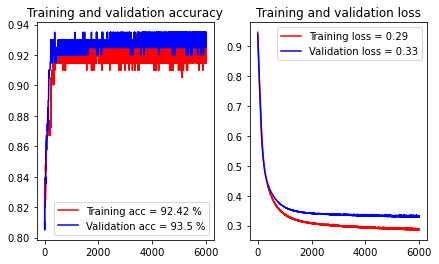

In [25]:
plot_acc_loss(history_L2)

รูปที่ 3.6 ความแม่นยำและค่าสูญเสียจากโมเดลเรกูลาร์ไรเซชัน L2



4536/4536 [==============================] - 4s 940us/step


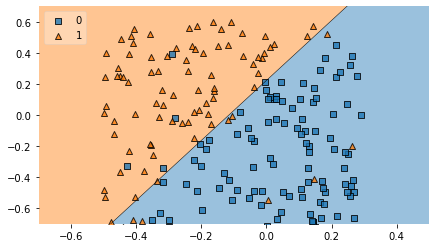

In [26]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model_L2, legend=2)
plt.xlim([-0.7,0.5])
plt.ylim([-0.7,0.7])
plt.show()

รูปที่ 3.7 เส้นแบ่งเขตการจำแนกข้อมูลจากโมเดลเรกูลาร์ไรเซชัน L2

ค่าของความแม่นยำและค่าสูญเสียอาจแตกต่างกันไปเล็กน้อยในแต่ละครั้งของการรัน แต่สิ่งที่สังเกตได้คือเส้นขอบเขตในรูปที่ 3.7 
จากโมเดลที่มีการเรกูลาร์ไรเซชันจะมีลักษณะเข้าใกล้เส้นตรงมากกว่า แสดงถึงโมเดลมีการฟิตเกินน้อยกว่า 



<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja 2022</div>